In [41]:
import pandas as pd
import numpy as np
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import missingno as msno


# Loading and cleaning

## Edges

In [75]:
# edges = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/ORGB 672 - Org Networks/Assignements/A3/edges_sample.csv")
# edges = pd.DataFrame(edges)

edges = pd.read_csv("C:/Users/felix/Downloads/ona-project-data/edges_sample.csv")

First date in edges: 2008-01-02 00:00:00
Last date in edges: 2008-12-31 00:00:00


ego_examiner_id      2817
alter_examiner_id    1659
dtype: int64


<Axes: >

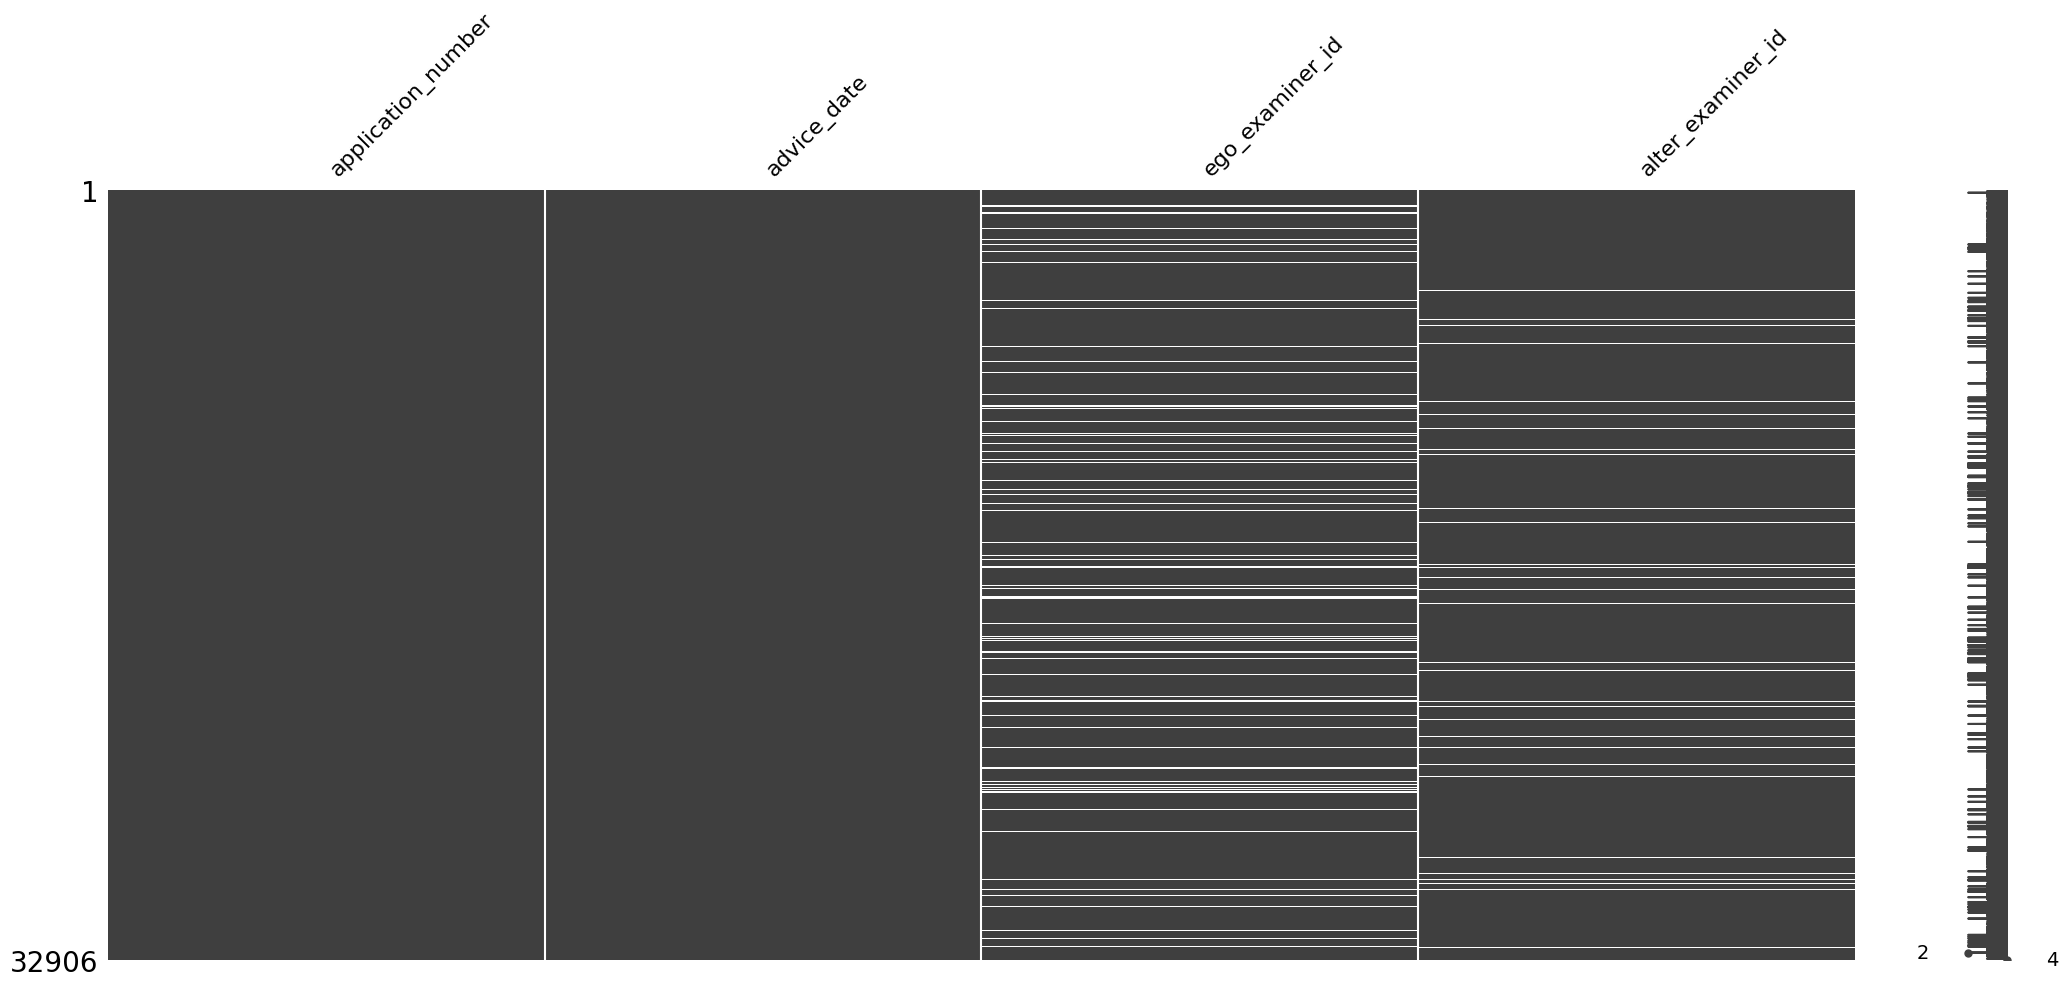

In [43]:
missing_values_with_na = edges.isnull().sum()[edges.isnull().sum() > 0]
print(missing_values_with_na)

# Visualize missingness using missingno
msno.matrix(edges)

In [44]:
edges.dtypes

application_number      int64
advice_date            object
ego_examiner_id       float64
alter_examiner_id     float64
dtype: object

### Dealing with Dates


In [76]:
# Convert the column to datetime format, coercing errors to NaT
edges['advice_date'] = pd.to_datetime(edges['advice_date'], format='%Y-%m-%d', errors='coerce')

# # Calculate the median date, ignoring NaT values
# median_advice_date = edges['advice_date'].dropna().median()

# # Fill NaT values with the median date and assign back to the DataFrame
# edges['advice_date'] = edges['advice_date'].fillna(median_advice_date)

# Format the datetime to the desired string format dd/mm/yy
edges['advice_date'] = edges['advice_date'].dt.strftime('%d/%m/%Y')

In [77]:
# Find first and last dates in app_last_action_date
edge_last_action_dates = pd.to_datetime(edges['advice_date'])
first_date = edge_last_action_dates.min()
last_date = edge_last_action_dates.max()

print(f"First date in edges: {first_date}")
print(f"Last date in edges: {last_date}")

First date in edges: 2008-01-02 00:00:00
Last date in edges: 2008-12-31 00:00:00


C:\Users\felix\AppData\Local\Temp\ipykernel_23528\3084903666.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  edge_last_action_dates = pd.to_datetime(edges['advice_date'])


### Dealing with NA

In [46]:
import pandas as pd

# Assuming edges is your DataFrame
# edges = pd.read_feather('path_to_your_file.feather')  # Uncomment and use this line if you need to load the data


# replaceid = '10000'
# # Check if "1000" exists in the specified columns
# exists_in_ego = edges['ego_examiner_id'].astype(str).eq(replaceid).any()
# exists_in_alter = edges['alter_examiner_id'].astype(str).eq(replaceid).any()

# # Print the results
# print(f"Does '1000' exist in 'ego_examiner_id'? {exists_in_ego}")
# print(f"Does '1000' exist in 'alter_examiner_id'? {exists_in_alter}")

# edges['ego_examiner_id'] = edges['ego_examiner_id'].fillna(replaceid)
# edges['alter_examiner_id'] = edges['alter_examiner_id'].fillna(replaceid)

# edges['ego_examiner_id'] = edges['ego_examiner_id'].astype(int)
# edges['alter_examiner_id'] = edges['alter_examiner_id'].astype(int)




############## Drop all rows that have NA values ##############
edges = edges.dropna()

# Verify the dropping worked
print(f"Shape after dropping NA rows: {edges.shape}")
print(f"Any NA values remaining: {edges.isnull().any().any()}")





Shape after dropping NA rows: (28614, 4)
Any NA values remaining: False


Series([], dtype: int64)


<Axes: >

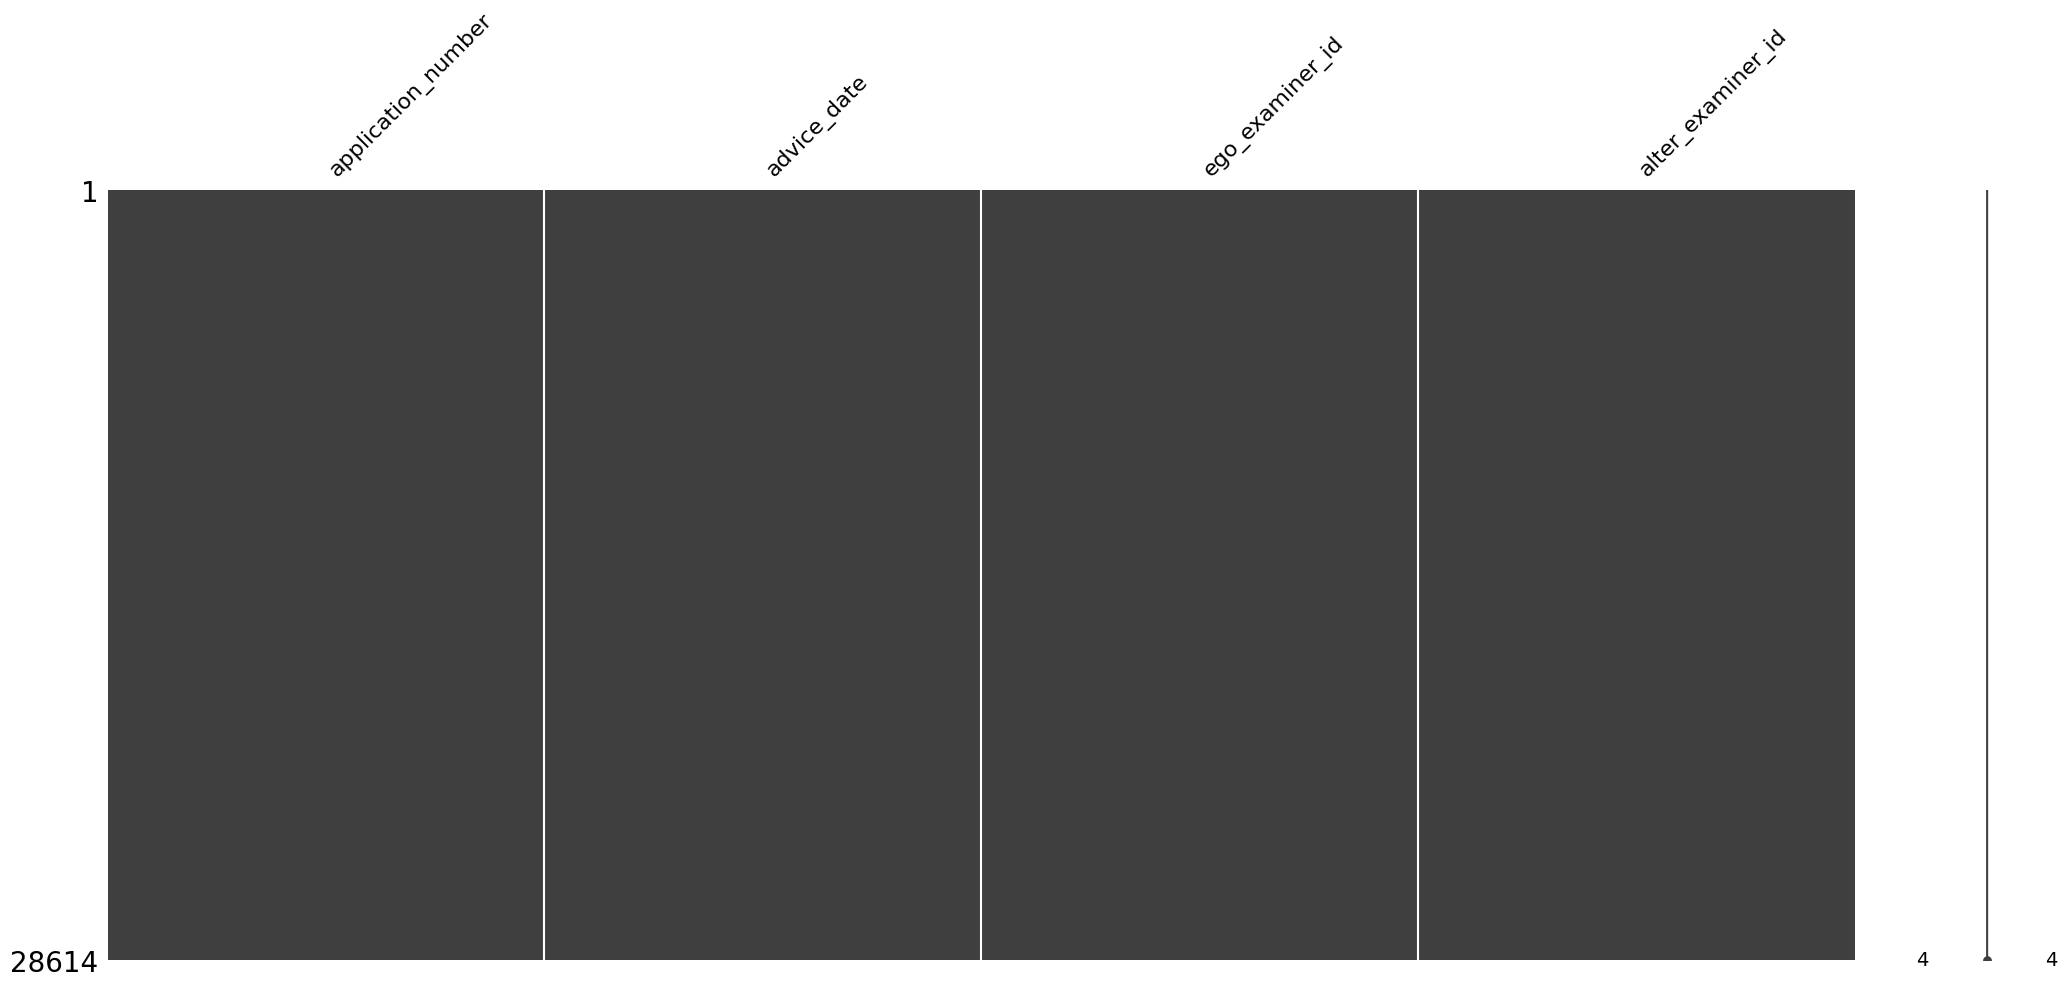

In [47]:
missing_values_with_na = edges.isnull().sum()[edges.isnull().sum() > 0]
print(missing_values_with_na)

# Visualize missingness using missingno
msno.matrix(edges)

## Details

In [48]:
starterdata = pd.read_feather("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/ORGB 672 - Org Networks/Assignements/A3/app_data_starter_coded_202502.feather")
starterdata = pd.DataFrame(starterdata)
starterdata


,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date
0,08284457,96082.0,1764.0,2000-01-26,30jan2003 00:00:00,ISS,female,white,2000-01-10
1,08413193,87678.0,1764.0,2000-10-11,27sep2010 00:00:00,ISS,None,white,2000-01-04
2,08531853,63213.0,1752.0,2000-05-17,30mar2009 00:00:00,ISS,female,white,2000-01-06
3,08637752,73788.0,1648.0,2001-07-20,07sep2009 00:00:00,ISS,female,white,2000-01-04
4,08682726,77294.0,1762.0,2000-04-10,19apr2001 00:00:00,ABN,male,white,2000-01-03
...,...,...,...,...,...,...,...,...,...
2018472,95002015,73382.0,2184.0,2012-07-12,22jan2013 00:00:00,PEND,male,black,2002-10-23
2018473,95002034,98907.0,2184.0,2012-07-06,25sep2012 00:00:00,PEND,None,black,2002-06-28
2018474,95002161,98907.0,2184.0,2012-09-07,01oct2012 00:00:00,PEND,None,black,2002-06-28
2018475,95002226,66282.0,2184.0,2012-09-13,05mar2013 00:00:00,PEND,male,Asian,2003-11-25


examiner_id               9229
app_last_action_date      4610
gender                  303859
dtype: int64


<Axes: >

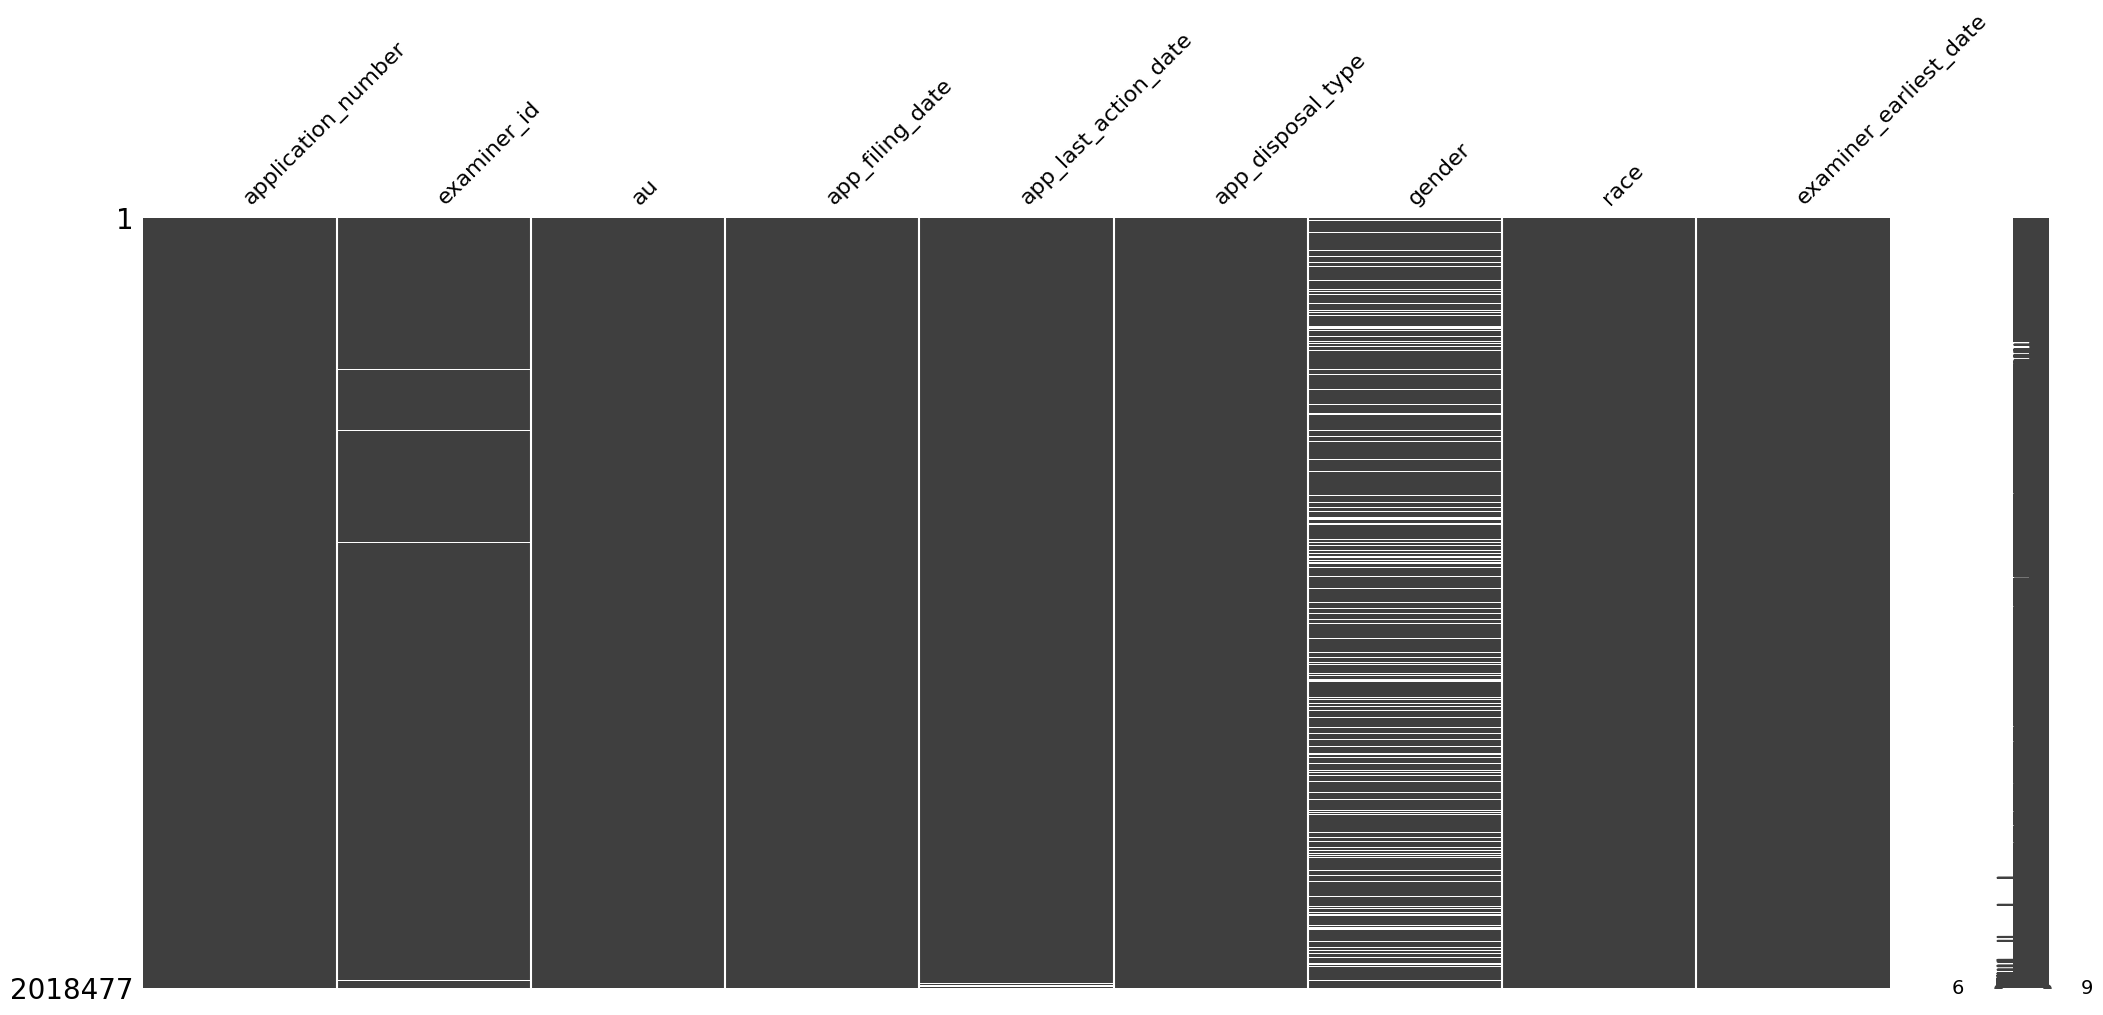

In [49]:
missing_values_with_na = starterdata.isnull().sum()[starterdata.isnull().sum() > 0]
print(missing_values_with_na)

# Visualize missingness using missingno
msno.matrix(starterdata)

### Dealling with dates

In [50]:
# Gender based on name
# tenure is 1st - last action
# drop examiner id
# au give department name


### Dealing with NA

In [51]:
# Convert the columns to datetime format, coercing errors to NaT
starterdata['app_filing_date'] = pd.to_datetime(starterdata['app_filing_date'], format='%d%b%Y %H:%M:%S', errors='coerce')
starterdata['examiner_earliest_date'] = pd.to_datetime(starterdata['examiner_earliest_date'], format='%d%b%Y %H:%M:%S', errors='coerce')
starterdata['app_last_action_date'] = pd.to_datetime(starterdata['app_last_action_date'], format='%d%b%Y %H:%M:%S', errors='coerce')


# # Calculate the median date for each column, ignoring NaT values
# median_app_filing_date = starterdata['app_filing_date'].dropna().median()
# median_examiner_earliest_date = starterdata['examiner_earliest_date'].dropna().median()


# Calculate the median date, ignoring NaT values
latest_date = starterdata['app_last_action_date'].dropna().max()




# # Fill NaT values with the median dates and assign back to the DataFrame
# starterdata['app_filing_date'] = starterdata['app_filing_date'].fillna(median_app_filing_date)
# starterdata['examiner_earliest_date'] = starterdata['examiner_earliest_date'].fillna(median_examiner_earliest_date)

# Fill NaT values with the last date
starterdata['app_last_action_date'].fillna(latest_date, inplace=True)

# Format the datetime to the desired string format dd/mm/yy
starterdata['app_filing_date'] = starterdata['app_filing_date'].dt.strftime('%d/%m/%Y')
starterdata['examiner_earliest_date'] = starterdata['examiner_earliest_date'].dt.strftime('%d/%m/%Y')
starterdata['app_last_action_date'] = starterdata['app_last_action_date'].dt.strftime('%d/%m/%Y')




C:\Users\felix\AppData\Local\Temp\ipykernel_23528\3773342086.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  starterdata['app_last_action_date'].fillna(latest_date, inplace=True)


In [52]:
# Creating a dictionary to map examiner_id to gender from non-missing values
examiner_gender_map = starterdata.dropna(subset=['gender']).groupby('examiner_id')['gender'].first().to_dict()




# For rows with missing gender, look up the examiner_id in our map
# If the examiner has a known gender in other rows, use that; otherwise, keep it NaN
starterdata.loc[starterdata['gender'].isna(), 'gender'] = starterdata.loc[starterdata['gender'].isna(), 'examiner_id'].map(examiner_gender_map)

starterdata['gender'] = starterdata['gender'].fillna('Other')


In [53]:
# replaceidstarterdata = '10000'
# # Check if "1000" exists in the specified columns
# exists_in_ego = starterdata['examiner_id'].astype(str).eq(replaceid).any()

# # Print the results
# print(f"Does '{replaceidstarterdata}' exist in 'examiner_id'? {exists_in_ego}")

# starterdata['examiner_id'] = starterdata['examiner_id'].fillna(replaceid)

# starterdata['examiner_id'] = starterdata['examiner_id'].astype(int)

# Drop all rows where examiner_id is NA
starterdata = starterdata.dropna(subset=['examiner_id'])

# Verify the dropping worked
print(f"Shape after dropping NA rows in examiner_id: {starterdata.shape}")
print(f"Any NA values remaining in examiner_id: {starterdata['examiner_id'].isnull().any()}")


Shape after dropping NA rows in examiner_id: (2009248, 9)
Any NA values remaining in examiner_id: False


In [54]:
starterdata.dtypes

application_number         object
examiner_id               float64
au                        float64
app_filing_date            object
app_last_action_date       object
app_disposal_type          object
gender                     object
race                       object
examiner_earliest_date     object
dtype: object

In [55]:
starterdata['au'] = starterdata['au'].astype(int)
starterdata['application_number'] = starterdata['application_number'].astype(int)


C:\Users\felix\AppData\Local\Temp\ipykernel_23528\2402713991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['au'] = starterdata['au'].astype(int)
C:\Users\felix\AppData\Local\Temp\ipykernel_23528\2402713991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['application_number'] = starterdata['application_number'].astype(int)


In [56]:
display(starterdata)

,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date
0,8284457,96082.0,1764,26/01/2000,30/01/2003,ISS,female,white,10/01/2000
1,8413193,87678.0,1764,11/10/2000,27/09/2010,ISS,Other,white,04/01/2000
2,8531853,63213.0,1752,17/05/2000,30/03/2009,ISS,female,white,06/01/2000
3,8637752,73788.0,1648,20/07/2001,07/09/2009,ISS,female,white,04/01/2000
4,8682726,77294.0,1762,10/04/2000,19/04/2001,ABN,male,white,03/01/2000
...,...,...,...,...,...,...,...,...,...
2018472,95002015,73382.0,2184,12/07/2012,22/01/2013,PEND,male,black,23/10/2002
2018473,95002034,98907.0,2184,06/07/2012,25/09/2012,PEND,Other,black,28/06/2002
2018474,95002161,98907.0,2184,07/09/2012,01/10/2012,PEND,Other,black,28/06/2002
2018475,95002226,66282.0,2184,13/09/2012,05/03/2013,PEND,male,Asian,25/11/2003


Series([], dtype: int64)


<Axes: >

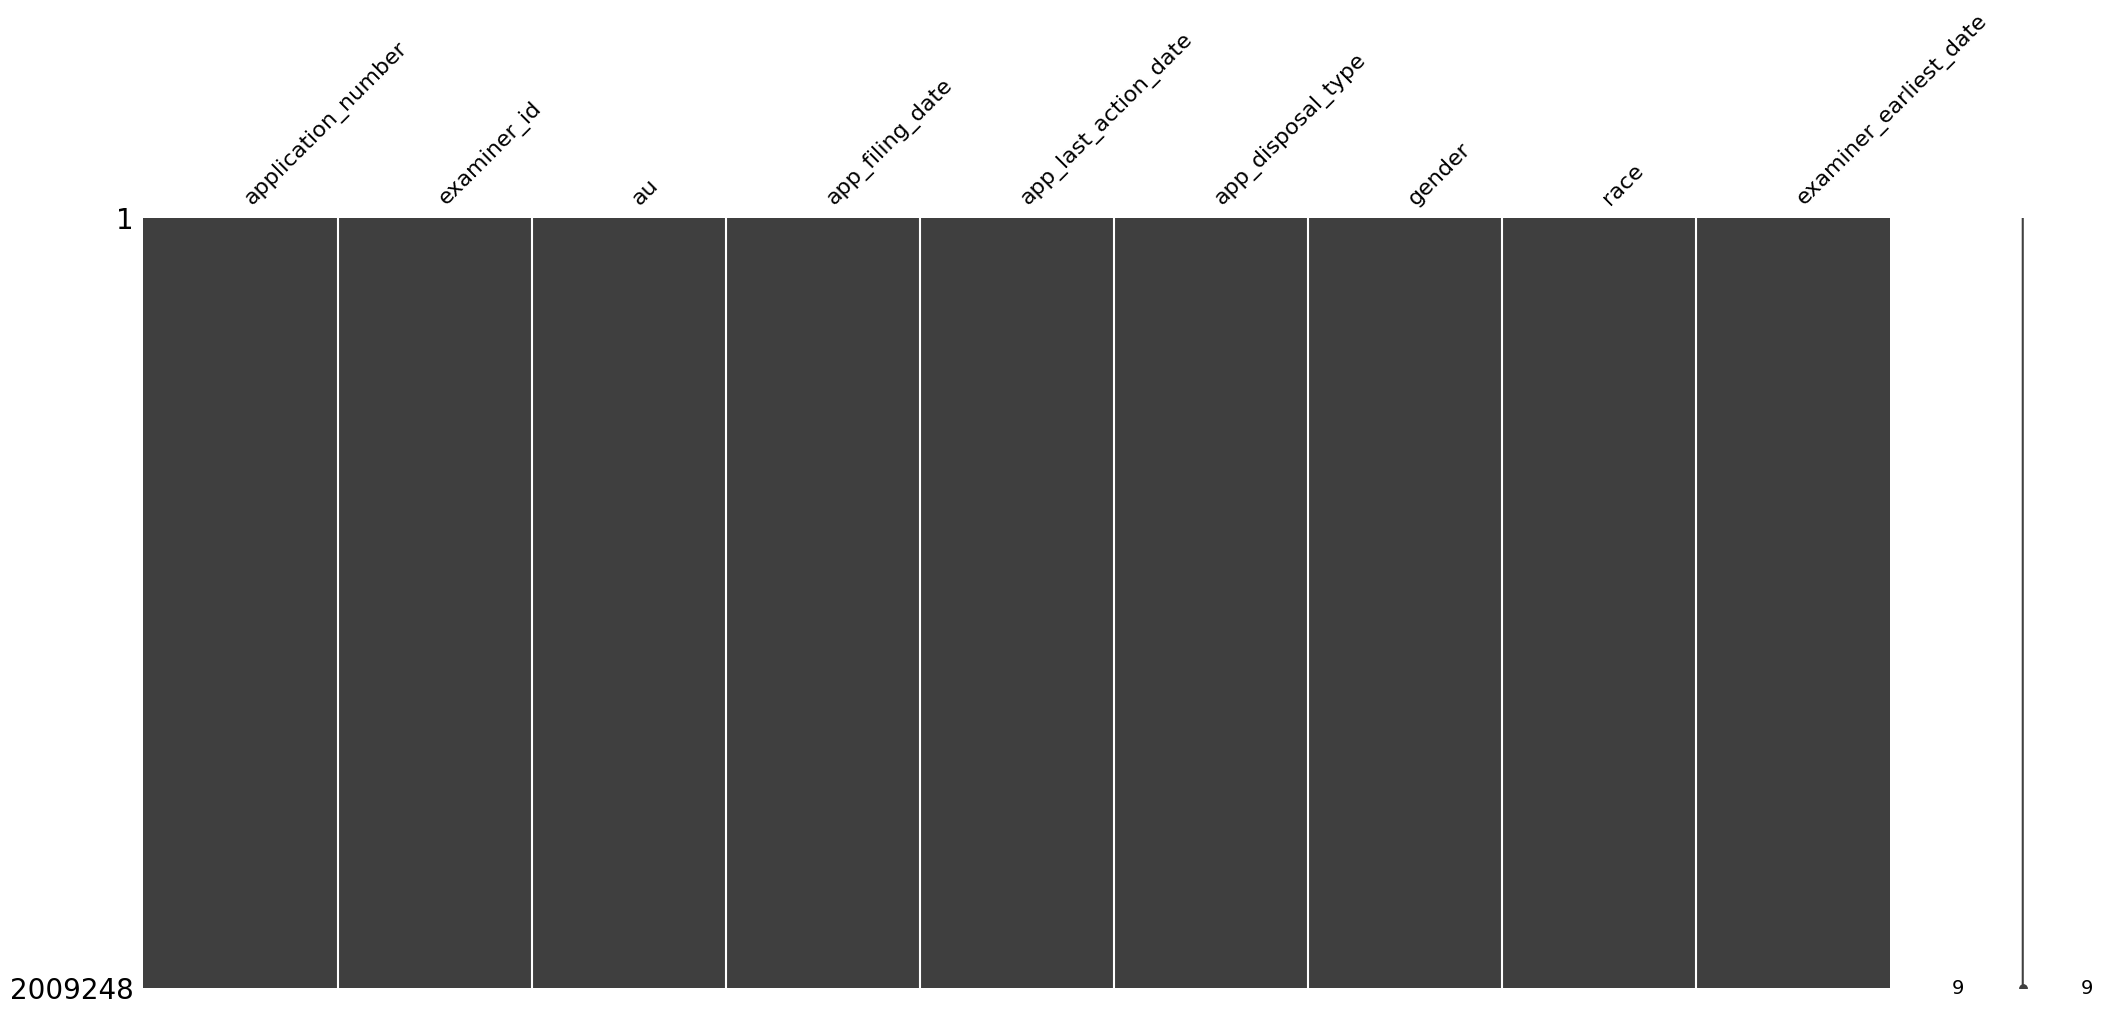

In [57]:
missing_values_with_na = starterdata.isnull().sum()[starterdata.isnull().sum() > 0]
print(missing_values_with_na)

# Visualize missingness using missingno
msno.matrix(starterdata)

In [58]:
# Print unique values for race and gender
print("Unique race values:")
print(starterdata['race'].unique())

print("\nUnique gender values:")
print(starterdata['gender'].unique())

# Print counts for each race and gender
print("\nRace counts:")
race_counts = starterdata['race'].value_counts()
print(race_counts)
print("\nRace proportions:")
print(starterdata['race'].value_counts(normalize=True))

print("\nGender counts:")
gender_counts = starterdata['gender'].value_counts()
print(gender_counts)
print("\nGender proportions:")
print(starterdata['gender'].value_counts(normalize=True))

Unique race values:
['white' 'black' 'Asian' 'Hispanic' 'other']

Unique gender values:
['female' 'Other' 'male']

Race counts:
race
white       1267298
Asian        591644
black         89559
Hispanic      58856
other          1891
Name: count, dtype: int64

Race proportions:
race
white       0.630732
Asian       0.294460
black       0.044573
Hispanic    0.029293
other       0.000941
Name: proportion, dtype: float64

Gender counts:
gender
male      1143391
female     571227
Other      294630
Name: count, dtype: int64

Gender proportions:
gender
male      0.569064
female    0.284299
Other     0.146637
Name: proportion, dtype: float64


In [59]:
tech_center_to_department = {
    16: "Biotechnology_Organic",
    17: "Chemical_Materials-Engineering",
    21: "Computer-Architecture_Software_Information Security",
    24: "Computer-Networks_Multiplex_Cable_Cryptography-Security",
    26: "Communications",
    28: "Semiconductors, Electrical and Optical Systems and Components",
    29: "Designs",
    36: "Transportation, Electronic Commerce, Construction, Agriculture, Licensing and Review",
    37: "Mechanical Engineering, Manufacturing and Products"
}


In [60]:
# Extract the first 2 digits from the 'au' column
starterdata['tech_center'] = (starterdata['au'] // 100).astype(int)

# Map the tech_center to department names using the dictionary
starterdata['center_name'] = starterdata['tech_center'].map(tech_center_to_department)

# For any tech centers not in the dictionary, mark as "Other"
starterdata['center_name'].fillna("Other", inplace=True)


# Count the number of applications by department
center_counts = starterdata['center_name'].value_counts()
print("\nNumber of applications by department:")
print(center_counts)


# Workgroup mapping
# Create workgroup column based on the first 3 digits of the AU column
starterdata['workgroup'] = (starterdata['au'] // 10).astype(int)

# Count the number of applications by workgroup
workgroup_counts = starterdata['workgroup'].value_counts()
print("\nNumber of applications by workgroup:")
print(workgroup_counts.head(10))  # Show just the top 10 workgroups

C:\Users\felix\AppData\Local\Temp\ipykernel_23528\1360096356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['tech_center'] = (starterdata['au'] // 100).astype(int)
C:\Users\felix\AppData\Local\Temp\ipykernel_23528\1360096356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['center_name'] = starterdata['tech_center'].map(tech_center_to_department)
C:\Users\felix\AppData\Local\Temp\ipykernel_23528\1360096356.py:8: FutureWarning: A value is trying to be set on a copy of a DataFr


Number of applications by department:
center_name
Chemical_Materials-Engineering                             717175
Biotechnology_Organic                                      530918
Computer-Architecture_Software_Information Security        410480
Computer-Networks_Multiplex_Cable_Cryptography-Security    350675
Name: count, dtype: int64

Number of applications by workgroup:
workgroup
162    140708
179    132856
164     92531
176     90972
163     89999
161     89057
177     83004
172     79050
171     76314
174     75079
Name: count, dtype: int64


C:\Users\felix\AppData\Local\Temp\ipykernel_23528\1360096356.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['center_name'].fillna("Other", inplace=True)
C:\Users\felix\AppData\Local\Temp\ipykernel_23528\1360096356.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['workgroup'] = (starterdata['au'] // 10).astype(int)


In [61]:

# Check for self-loops
self_loops = edges[edges['ego_examiner_id'] == edges['alter_examiner_id']]

if not self_loops.empty:
    print("Self-loops found:")
    print(self_loops)
else:
    print("No self-loops found.")

# Check for duplicate entries in edges
duplicate_edges = edges[edges.duplicated()]

if not duplicate_edges.empty:
    print("\nDuplicate edges found:")
    print(duplicate_edges)
else:
    print("No duplicate edges found.")

# Check for data mismatch between edges and starterdata
examiner_ids_in_edges = set(edges['ego_examiner_id']).union(set(edges['alter_examiner_id']))
examiner_ids_in_starterdata = set(starterdata['examiner_id'])

missing_examiner_ids = examiner_ids_in_edges - examiner_ids_in_starterdata

# if missing_examiner_ids:
#     print("\nExaminer IDs in edges but not in starterdata:")
#     print(missing_examiner_ids)
# else:
#     print("All examiner IDs in edges are present in starterdata.")



Self-loops found:
       application_number advice_date  ego_examiner_id  alter_examiner_id
11                9484331  07/02/2008          72253.0            72253.0
192               9683599  08/01/2008          88496.0            88496.0
318               9750105  21/07/2008          65231.0            65231.0
796               9946781  01/04/2008          65231.0            65231.0
1009             10006760  09/12/2008          74224.0            74224.0
...                   ...         ...              ...                ...
32526            11965459  26/11/2008          69394.0            69394.0
32592            12014084  03/07/2008          91190.0            91190.0
32610            12022133  21/07/2008          91190.0            91190.0
32639            12037172  23/12/2008          88818.0            88818.0
32682            12057827  18/11/2008          69394.0            69394.0

[843 rows x 4 columns]
No duplicate edges found.


In [62]:
# Remove edges with examiner IDs not present in starterdata
edges_cleaned = edges[
    edges['ego_examiner_id'].isin(starterdata['examiner_id']) &
    edges['alter_examiner_id'].isin(starterdata['examiner_id'])
]

# Verify the cleaning process
missing_examiner_ids_after_cleaning = set(edges_cleaned['ego_examiner_id']).union(set(edges_cleaned['alter_examiner_id'])) - set(starterdata['examiner_id'])

if not missing_examiner_ids_after_cleaning:
    print("All examiner IDs in cleaned edges are present in starterdata.")
else:
    print("There are still missing examiner IDs after cleaning.")


All examiner IDs in cleaned edges are present in starterdata.


In [64]:
print("'edges' data columns:")
print(edges.columns.tolist())
print("'data' data columns:")
print(starterdata.columns.tolist())


print("'edges' data types:")
print(edges.dtypes)
print("'data' data types:")
print(starterdata.dtypes)

'edges' data columns:
['application_number', 'advice_date', 'ego_examiner_id', 'alter_examiner_id']
'data' data columns:
['application_number', 'examiner_id', 'au', 'app_filing_date', 'app_last_action_date', 'app_disposal_type', 'gender', 'race', 'examiner_earliest_date', 'tech_center', 'center_name', 'workgroup']
'edges' data types:
application_number      int64
advice_date            object
ego_examiner_id       float64
alter_examiner_id     float64
dtype: object
'data' data types:
application_number          int64
examiner_id               float64
au                          int64
app_filing_date            object
app_last_action_date       object
app_disposal_type          object
gender                     object
race                       object
examiner_earliest_date     object
tech_center                 int64
center_name                object
workgroup                   int64
dtype: object


In [65]:
# Convert date columns to datetime64[ns] format
date_columns_edges = ['advice_date']  # Replace with actual date column names in edges
date_columns_starterdata = ['app_filing_date', 'app_last_action_date',  'examiner_earliest_date']  # Replace with actual date column names in starterdata

for col in date_columns_edges:
    edges[col] = pd.to_datetime(edges[col])

for col in date_columns_starterdata:
    starterdata[col] = pd.to_datetime(starterdata[col], format='mixed', dayfirst=True, errors='coerce')

# Print updated data types
print("\nUpdated 'edges' data types:")
print(edges.dtypes)
print("Updated 'data' data types:")
print(starterdata.dtypes)

C:\Users\felix\AppData\Local\Temp\ipykernel_23528\2401333663.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  edges[col] = pd.to_datetime(edges[col])
C:\Users\felix\AppData\Local\Temp\ipykernel_23528\2401333663.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges[col] = pd.to_datetime(edges[col])
C:\Users\felix\AppData\Local\Temp\ipykernel_23528\2401333663.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning


Updated 'edges' data types:
application_number             int64
advice_date           datetime64[ns]
ego_examiner_id              float64
alter_examiner_id            float64
dtype: object
Updated 'data' data types:
application_number                 int64
examiner_id                      float64
au                                 int64
app_filing_date           datetime64[ns]
app_last_action_date      datetime64[ns]
app_disposal_type                 object
gender                            object
race                              object
examiner_earliest_date    datetime64[ns]
tech_center                        int64
center_name                       object
workgroup                          int64
dtype: object


C:\Users\felix\AppData\Local\Temp\ipykernel_23528\2401333663.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata[col] = pd.to_datetime(starterdata[col], format='mixed', dayfirst=True, errors='coerce')


# Group Project EDA

In [66]:
# Convert date columns to datetime for calculation
starterdata['app_filing_date_dt'] = pd.to_datetime(starterdata['app_filing_date'], format='%d/%m/%Y', errors='coerce')
starterdata['app_last_action_date_dt'] = pd.to_datetime(starterdata['app_last_action_date'], format='%d/%m/%Y', errors='coerce')

# Calculate the difference in days
starterdata['processing_time'] = (starterdata['app_last_action_date_dt'] - starterdata['app_filing_date_dt']).dt.days

# Display some statistics about the new column
print("Processing Time Statistics (in days):")
print(f"Mean: {starterdata['processing_time'].mean():.2f}")
print(f"Median: {starterdata['processing_time'].median():.0f}")
print(f"Min: {starterdata['processing_time'].min()}")
print(f"Max: {starterdata['processing_time'].max()}")

# Check for any negative values (which would indicate data issues)
negative_days = starterdata[starterdata['processing_time'] < 0].shape[0]
print(f"Number of applications with negative processing time: {negative_days}")

# Drop the temporary datetime columns to save memory
starterdata.drop(['app_filing_date_dt', 'app_last_action_date_dt'], axis=1, inplace=True)

# Show the first few rows with the new column
starterdata[['application_number', 'app_filing_date', 'app_last_action_date', 'processing_time']].head()

C:\Users\felix\AppData\Local\Temp\ipykernel_23528\2502578150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['app_filing_date_dt'] = pd.to_datetime(starterdata['app_filing_date'], format='%d/%m/%Y', errors='coerce')
C:\Users\felix\AppData\Local\Temp\ipykernel_23528\2502578150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata['app_last_action_date_dt'] = pd.to_datetime(starterdata['app_last_action_date'], format='%d/%m/%Y', errors='coerce')
C:\Users\felix\AppData\Local\Temp\ipyk

Processing Time Statistics (in days):
Mean: 1384.43
Median: 1121
Min: -160
Max: 18159
Number of applications with negative processing time: 4


C:\Users\felix\AppData\Local\Temp\ipykernel_23528\2502578150.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starterdata.drop(['app_filing_date_dt', 'app_last_action_date_dt'], axis=1, inplace=True)


,application_number,app_filing_date,app_last_action_date,processing_time
0,8284457,2000-01-26,2003-01-30,1100
1,8413193,2000-10-11,2010-09-27,3638
2,8531853,2000-05-17,2009-03-30,3239
3,8637752,2001-07-20,2009-09-07,2971
4,8682726,2000-04-10,2001-04-19,374


In [67]:
starterdata.to_csv("starterdata_cleaned.csv", index=False)
edges_cleaned.to_csv("edges_cleaned.csv", index=False)

In [27]:
import networkx as nx
import pandas as pd

# Assuming edges and starterdata DataFrames are already loaded
# edges = pd.read_csv('edges.csv')
# starterdata = pd.read_csv('starterdata.csv')

# Create a network graph using networkx
G = nx.DiGraph()

# Add edges from the edges DataFrame
for _, row in edges.iterrows():
    G.add_edge(row['ego_examiner_id'], row['alter_examiner_id'])

# Print basic network statistics
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Merge edges with starterdata to get gender and workgroup information
edges_with_attributes = edges.copy()

# Create dictionaries for mapping examiner_id to attributes
gender_map = starterdata.set_index('examiner_id')['gender'].to_dict()
workgroup_map = starterdata.set_index('examiner_id')['workgroup'].to_dict()
center_map = starterdata.set_index('examiner_id')['tech_center'].to_dict()
race_map = starterdata.set_index('examiner_id')['race'].to_dict()
au_map = starterdata.set_index('examiner_id')['au'].to_dict()


# Add attributes to edges
edges_with_attributes['ego_gender'] = edges_with_attributes['ego_examiner_id'].map(gender_map)
edges_with_attributes['alter_gender'] = edges_with_attributes['alter_examiner_id'].map(gender_map)
edges_with_attributes['ego_workgroup'] = edges_with_attributes['ego_examiner_id'].map(workgroup_map)
edges_with_attributes['alter_workgroup'] = edges_with_attributes['alter_examiner_id'].map(workgroup_map)
edges_with_attributes['ego_race'] = edges_with_attributes['ego_examiner_id'].map(race_map)
edges_with_attributes['alter_race'] = edges_with_attributes['alter_examiner_id'].map(race_map)

edges_with_attributes['alter_au'] = edges_with_attributes['alter_examiner_id'].map(au_map)
edges_with_attributes['ego_au'] = edges_with_attributes['ego_examiner_id'].map(au_map)

# Add attributes to the nodes in the graph
for node in G.nodes():
    if node in gender_map:
        G.nodes[node]['gender'] = gender_map[node]
    if node in workgroup_map:
        G.nodes[node]['workgroup'] = workgroup_map[node]
    if node in center_map:
        G.nodes[node]['tech_center'] = center_map[node]
    if node in race_map:
        G.nodes[node]['race'] = race_map[node]

# Save the graph as a GraphML file
nx.write_graphml(G, "network_graph.graphml")
# Save the edges with attributes to a CSV file
edges_with_attributes.to_csv('edges_with_attributes.csv', index=False)



Number of nodes: 4085
Number of edges: 11057


In [24]:
print(f"Columns Edges: {edges.columns}")
print(f"Columns Starterdata: {starterdata.columns}")

Columns Edges: Index(['application_number', 'advice_date', 'ego_examiner_id',
       'alter_examiner_id'],
      dtype='object')
Columns Starterdata: Index(['application_number', 'examiner_id', 'au', 'app_filing_date',
       'app_last_action_date', 'app_disposal_type', 'gender', 'race',
       'examiner_earliest_date', 'tech_center', 'center_name', 'workgroup'],
      dtype='object')


# Data Dictionary

#### Edges DataFrame

| Column Name         | Description                                                                 | Data Type |
|---------------------|-----------------------------------------------------------------------------|-----------|
| application_number  | The unique identifier for the patent application.                          | String    |
| advice_date         | The date when the advice or interaction occurred.                           | Date      |
| ego_examiner_id     | The ID of the examiner who is the source of the advice or interaction.      | Integer   |
| alter_examiner_id   | The ID of the examiner who is the target of the advice or interaction.      | Integer   |

#### Starterdata DataFrame

| Column Name             | Description                                                                 | Data Type |
|-------------------------|-----------------------------------------------------------------------------|-----------|
| application_number      | The unique identifier for the patent application.                          | String    |
| examiner_id             | The unique ID of the examiner.                                              | Integer   |
| au                      | The art unit (workgroup) to which the examiner belongs.                     | String    |
| app_filing_date         | The date when the patent application was filed.                             | Date      |
| app_last_action_date    | The date of the last action taken on the patent application.                | Date      |
| app_disposal_type       | The type of disposal for the patent application (e.g., granted, abandoned).| String    |
| gender                  | The gender of the examiner.                                                | String    |
| race                    | The race of the examiner.                                                   | String    |
| examiner_earliest_date  | The earliest date associated with the examiner's tenure or hiring.          | Date      |
| workgroup               | The workgroup to which the examiner belongs.                                | String    |
| tech_center             | The technology center associated with the examiner's work.                  | String    |
| center_name             | The name of the center where the examiner works.                            | String    |


In [25]:
print("starterdata")
display(starterdata.head(5))

print("Edges")
display(edges.head(5))

starterdata


,application_number,examiner_id,au,app_filing_date,app_last_action_date,app_disposal_type,gender,race,examiner_earliest_date,tech_center,center_name,workgroup
0,8284457,96082.0,1764,26/01/2000,30/01/2003,ISS,female,white,10/01/2000,17,Chemical_Materials-Engineering,176
1,8413193,87678.0,1764,11/10/2000,27/09/2010,ISS,Other,white,04/01/2000,17,Chemical_Materials-Engineering,176
2,8531853,63213.0,1752,17/05/2000,30/03/2009,ISS,female,white,06/01/2000,17,Chemical_Materials-Engineering,175
3,8637752,73788.0,1648,20/07/2001,07/09/2009,ISS,female,white,04/01/2000,16,Biotechnology_Organic,164
4,8682726,77294.0,1762,10/04/2000,19/04/2001,ABN,male,white,03/01/2000,17,Chemical_Materials-Engineering,176


Edges


,application_number,advice_date,ego_examiner_id,alter_examiner_id
0,9402488,17/11/2008,84356.0,66266.0
1,9402488,17/11/2008,84356.0,63519.0
2,9402488,17/11/2008,84356.0,98531.0
3,9445135,21/08/2008,92953.0,71313.0
4,9445135,21/08/2008,92953.0,93865.0


# Graph Analysis

In [26]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import missingno as msno

# Load the GraphML file
G = nx.read_graphml('network_graph.graphml')

# Print basic information about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


# Extract node attributes into a DataFrame
node_data = []
for node, data in G.nodes(data=True):
    node_data.append(data)

df = pd.DataFrame(node_data)

Number of nodes: 4085
Number of edges: 11057


In [29]:
# Check for the presence of the 'gender' attribute in all nodes
missing_gender_nodes = [node for node, data in G.nodes(data=True) if 'gender' not in data]



# List of nodes to remove
nodes_to_remove = [node for node in G.nodes() if 'gender' not in G.nodes[node]]

# Remove nodes with missing 'gender' attribute
G.remove_nodes_from(nodes_to_remove)

# Verify the removal
missing_gender_nodes_after_removal = [node for node in G.nodes() if 'gender' not in G.nodes[node]]

if not missing_gender_nodes_after_removal:
    print("All nodes with missing 'gender' attribute have been removed.")
else:
    print("There are still nodes missing the 'gender' attribute.")


All nodes with missing 'gender' attribute have been removed.


## EDA 

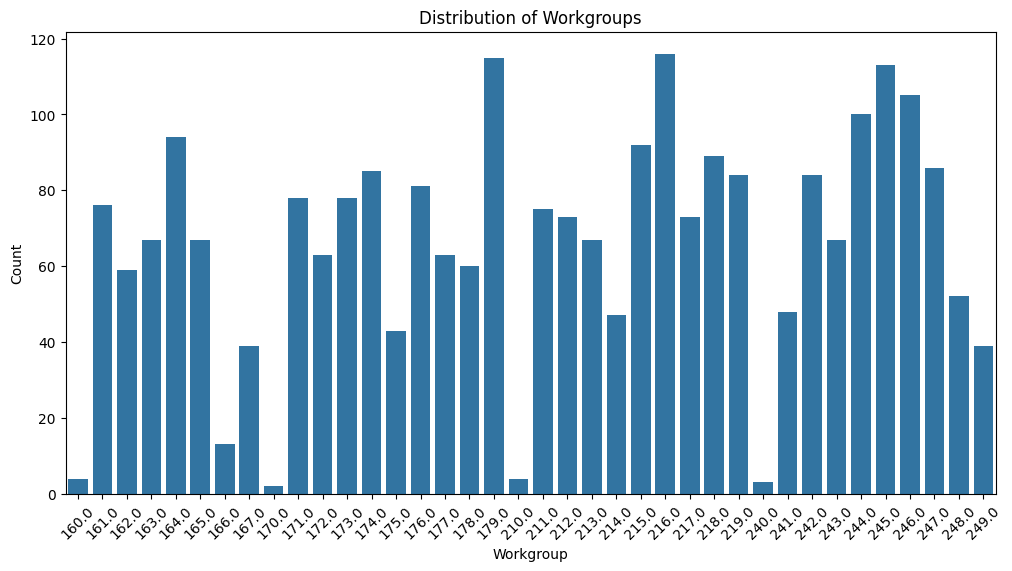

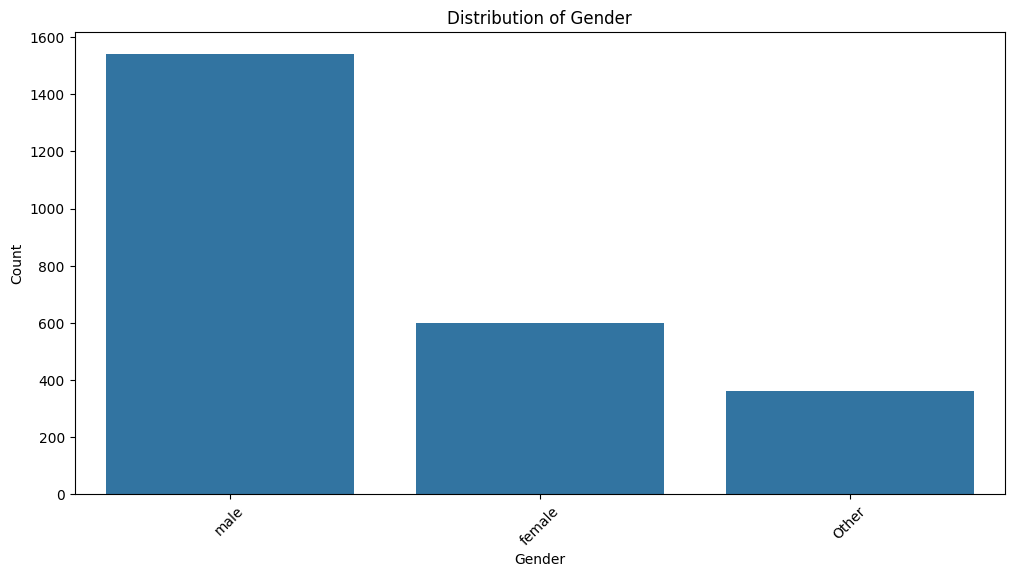

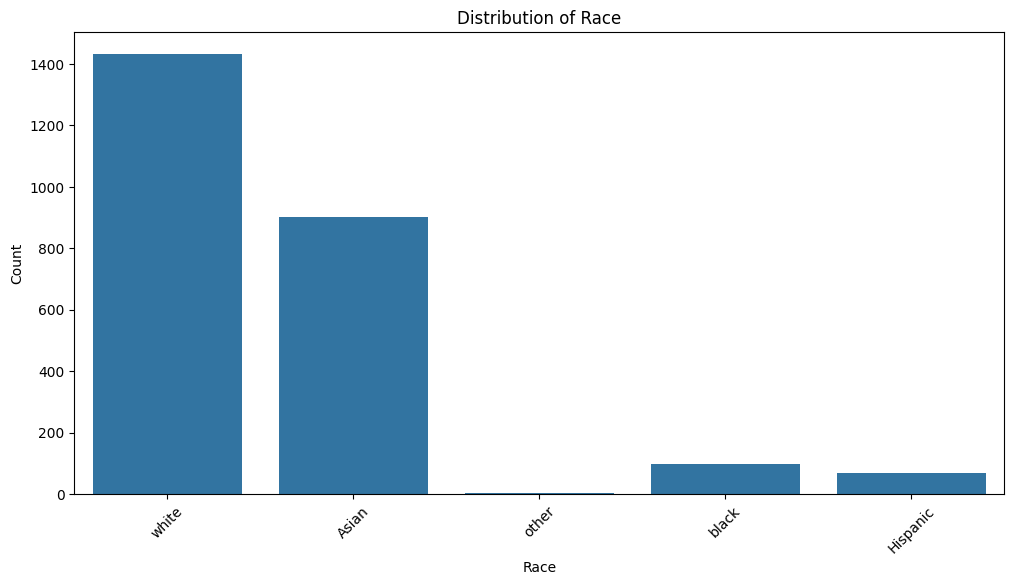

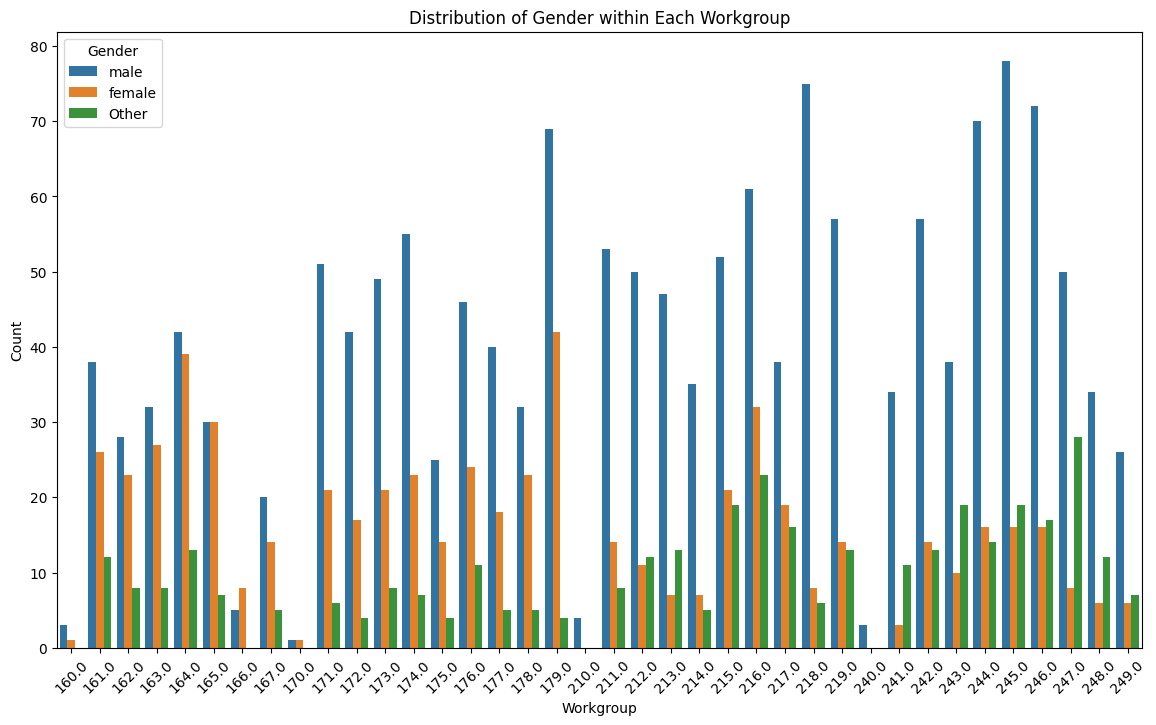

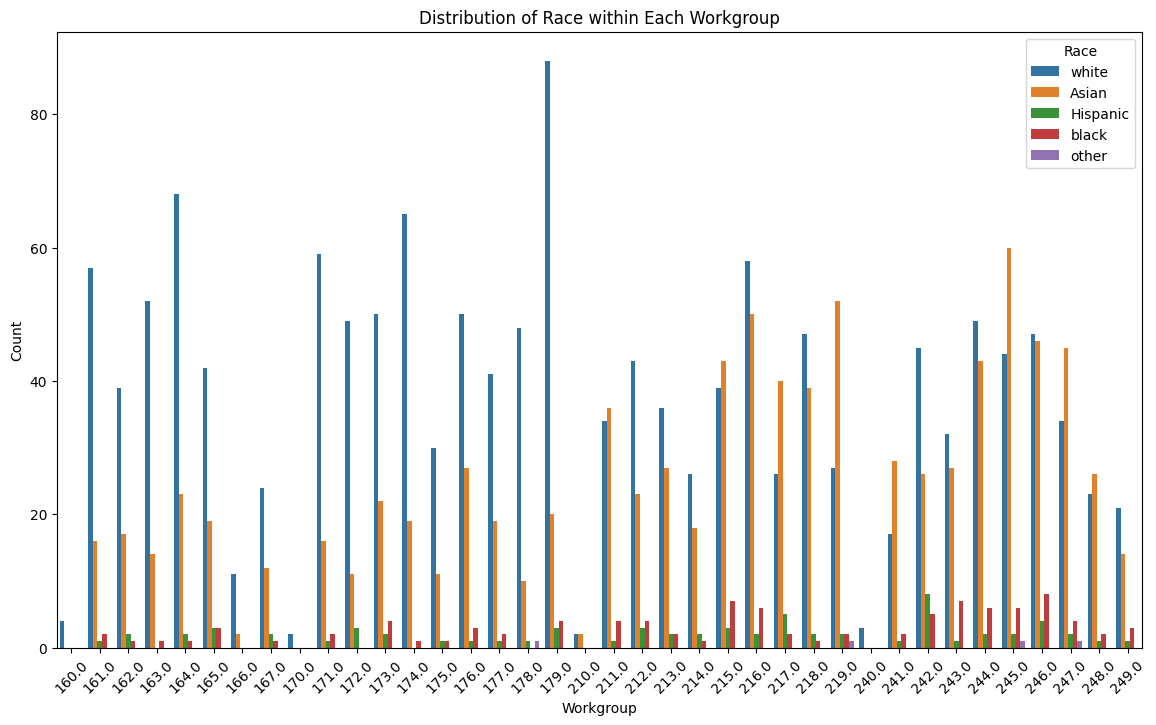

In [30]:



# Plot the distribution of workgroups
plt.figure(figsize=(12, 6))
sns.countplot(x='workgroup', data=df)
plt.title('Distribution of Workgroups')
plt.xlabel('Workgroup')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of gender
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of race
plt.figure(figsize=(12, 6))
sns.countplot(x='race', data=df)
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()





# Plot the distribution of gender within each workgroup
plt.figure(figsize=(14, 8))
sns.countplot(x='workgroup', hue='gender', data=df)
plt.title('Distribution of Gender within Each Workgroup')
plt.xlabel('Workgroup')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Plot the distribution of race within each workgroup
plt.figure(figsize=(14, 8))
sns.countplot(x='workgroup', hue='race', data=df)
plt.title('Distribution of Race within Each Workgroup')
plt.xlabel('Workgroup')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.show()


Gender distribution by workgroup:


count              proportion                    
gender    Other female  male      Other    female      male
workgroup                                                  
160         0.0    1.0   3.0   0.000000  0.250000  0.750000
161        12.0   26.0  38.0   0.157895  0.342105  0.500000
162         8.0   23.0  28.0   0.135593  0.389831  0.474576
163         8.0   27.0  32.0   0.119403  0.402985  0.477612
164        13.0   39.0  42.0   0.138298  0.414894  0.446809
165         7.0   30.0  30.0   0.104478  0.447761  0.447761
166         0.0    8.0   5.0   0.000000  0.615385  0.384615
167         5.0   14.0  20.0   0.128205  0.358974  0.512821
170         0.0    1.0   1.0   0.000000  0.500000  0.500000
171         6.0   21.0  51.0   0.076923  0.269231  0.653846
172         4.0   17.0  42.0   0.063492  0.269841  0.666667
173         8.0   21.0  49.0   0.102564  0.269231  0.628205
174         7.0   23.0  55.0   0.082353  0.270588  0.647059
175         4.0   14.0  25.0   0.093023  0.325581  0.581395
176        11.0   24.0  46.0   0.135802  0.296296  0.567901
177         5.0   18.0  40.0   0.079365  0.285714  0.634921
178         5.0   23.0  32.0   0.083333  0.383333  0.533333
179         4.0   42.0  69.0   0.034783  0.365217  0.600000
210         0.0    0.0   4.0   0.000000  0.000000  1.000000
211         8.0   14.0  53.0   0.106667  0.186667  0.706667
212        12.0   11.0  50.0   0.164384  0.150685  0.684932
213        13.0    7.0  47.0   0.194030  0.104478  0.701493
214         5.0    7.0  35.0   0.106383  0.148936  0.744681
215        19.0   21.0  52.0   0.206522  0.228261  0.565217
216        23.0   32.0  61.0   0.198276  0.275862  0.525862
217        16.0   19.0  38.0   0.219178  0.260274  0.520548
218         6.0    8.0  75.0   0.067416  0.089888  0.842697
219        13.0   14.0  57.0   0.154762  0.166667  0.678571
240         0.0    0.0   3.0   0.000000  0.000000  1.000000
241        11.0    3.0  34.0   0.229167  0.062500  0.708333
242        13.0   14.0  57.0   0.154762  0.166667  0.678571
243        19.0   10.0  38.0   0.283582  0.149254  0.567164
244        14.0   16.0  70.0   0.140000  0.160000  0.700000
245        19.0   16.0  78.0   0.168142  0.141593  0.690265
246        17.0   16.0  72.0   0.161905  0.152381  0.685714
247        28.0    8.0  50.0   0.325581  0.093023  0.581395
248        12.0    6.0  34.0   0.230769  0.115385  0.653846
249         7.0    6.0  26.0   0.179487  0.153846  0.666667


Race distribution by workgroup:


count                            proportion                      \
race      Asian Hispanic black other white      Asian  Hispanic     black   
workgroup                                                                   
160         0.0      0.0   0.0   0.0   4.0   0.000000  0.000000  0.000000   
161        16.0      1.0   2.0   0.0  57.0   0.210526  0.013158  0.026316   
162        17.0      2.0   1.0   0.0  39.0   0.288136  0.033898  0.016949   
163        14.0      0.0   1.0   0.0  52.0   0.208955  0.000000  0.014925   
164        23.0      2.0   1.0   0.0  68.0   0.244681  0.021277  0.010638   
165        19.0      3.0   3.0   0.0  42.0   0.283582  0.044776  0.044776   
166         2.0      0.0   0.0   0.0  11.0   0.153846  0.000000  0.000000   
167        12.0      2.0   1.0   0.0  24.0   0.307692  0.051282  0.025641   
170         0.0      0.0   0.0   0.0   2.0   0.000000  0.000000  0.000000   
171        16.0      1.0   2.0   0.0  59.0   0.205128  0.012821  0.025641   
172        11.0      3.0   0.0   0.0  49.0   0.174603  0.047619  0.000000   
173        22.0      2.0   4.0   0.0  50.0   0.282051  0.025641  0.051282   
174        19.0      0.0   1.0   0.0  65.0   0.223529  0.000000  0.011765   
175        11.0      1.0   1.0   0.0  30.0   0.255814  0.023256  0.023256   
176        27.0      1.0   3.0   0.0  50.0   0.333333  0.012346  0.037037   
177        19.0      1.0   2.0   0.0  41.0   0.301587  0.015873  0.031746   
178        10.0      1.0   0.0   1.0  48.0   0.166667  0.016667  0.000000   
179        20.0      3.0   4.0   0.0  88.0   0.173913  0.026087  0.034783   
210         2.0      0.0   0.0   0.0   2.0   0.500000  0.000000  0.000000   
211        36.0      1.0   4.0   0.0  34.0   0.480000  0.013333  0.053333   
212        23.0      3.0   4.0   0.0  43.0   0.315068  0.041096  0.054795   
213        27.0      2.0   2.0   0.0  36.0   0.402985  0.029851  0.029851   
214        18.0      2.0   1.0   0.0  26.0   0.382979  0.042553  0.021277   
215        43.0      3.0   7.0   0.0  39.0   0.467391  0.032609  0.076087   
216        50.0      2.0   6.0   0.0  58.0   0.431034  0.017241  0.051724   
217        40.0      5.0   2.0   0.0  26.0   0.547945  0.068493  0.027397   
218        39.0      2.0   1.0   0.0  47.0   0.438202  0.022472  0.011236   
219        52.0      2.0   2.0   1.0  27.0   0.619048  0.023810  0.023810   
240         0.0      0.0   0.0   0.0   3.0   0.000000  0.000000  0.000000   
241        28.0      1.0   2.0   0.0  17.0   0.583333  0.020833  0.041667   
242        26.0      8.0   5.0   0.0  45.0   0.309524  0.095238  0.059524   
243        27.0      1.0   7.0   0.0  32.0   0.402985  0.014925  0.104478   
244        43.0      2.0   6.0   0.0  49.0   0.430000  0.020000  0.060000   
245        60.0      2.0   6.0   1.0  44.0   0.530973  0.017699  0.053097   
246        46.0      4.0   8.0   0.0  47.0   0.438095  0.038095  0.076190   
247        45.0      2.0   4.0   1.0  34.0   0.523256  0.023256  0.046512   
248        26.0      1.0   2.0   0.0  23.0   0.500000  0.019231  0.038462   
249        14.0      1.0   3.0   0.0  21.0   0.358974  0.025641  0.076923   

                               
race          other     white  
workgroup                      
160        0.000000  1.000000  
161        0.000000  0.750000  
162        0.000000  0.661017  
163        0.000000  0.776119  
164        0.000000  0.723404  
165        0.000000  0.626866  
166        0.000000  0.846154  
167        0.000000  0.615385  
170        0.000000  1.000000  
171        0.000000  0.756410  
172        0.000000  0.777778  
173        0.000000  0.641026  
174        0.000000  0.764706  
175        0.000000  0.697674  
176        0.000000  0.617284  
177        0.000000  0.650794  
178        0.016667  0.800000  
179        0.000000  0.765217  
210        0.000000  0.500000  
211        0.000000  0.453333  
212        0.000000  0.589041  
213        0.000000  0.537313  
214        0.000000  0.553191  
215        0.000000 

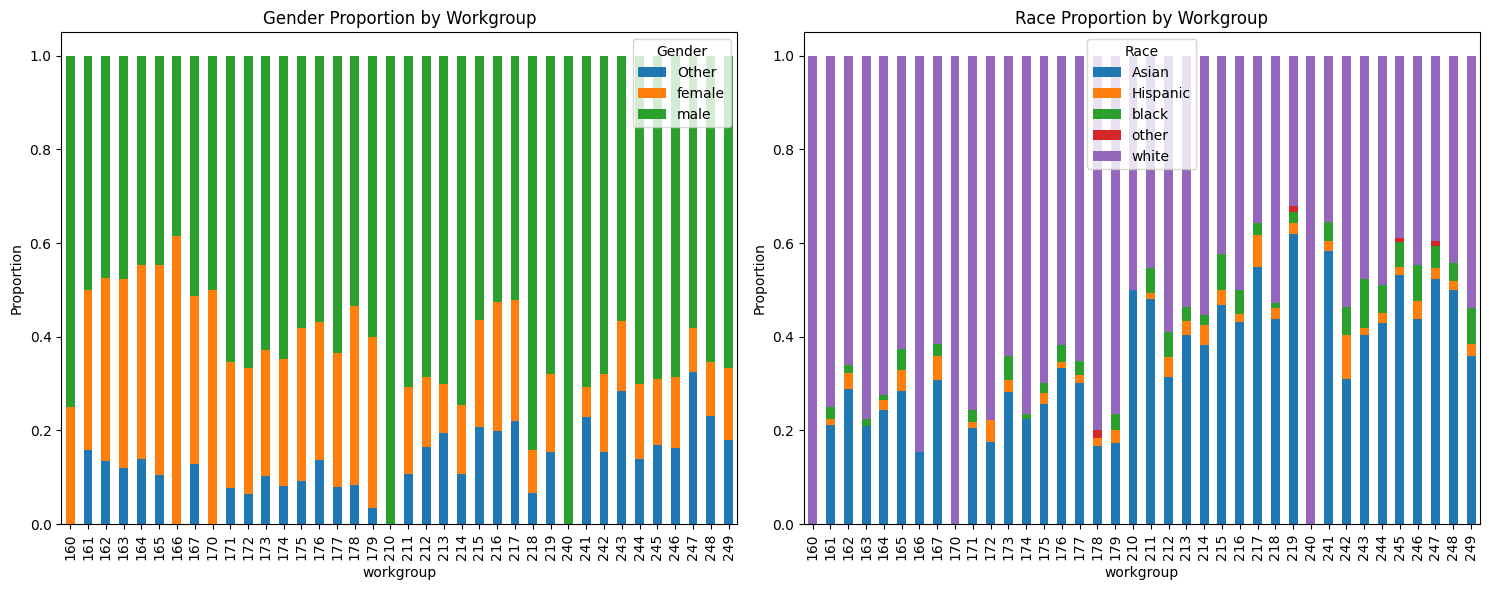

In [31]:


# Create DataFrames for workgroup statistics
# First, extract node attributes into a DataFrame for easier analysis
node_df = pd.DataFrame([data for node, data in G.nodes(data=True) if 'gender' in data and 'race' in data])

# Create gender dataset
gender_counts = node_df.groupby(['workgroup', 'gender']).size().reset_index(name='count')
gender_total = node_df.groupby('workgroup').size().reset_index(name='total')
gender_counts = gender_counts.merge(gender_total, on='workgroup')
gender_counts['proportion'] = gender_counts['count'] / gender_counts['total']

# Create a pivot table for gender
gender_pivot = pd.pivot_table(
    gender_counts, 
    values=['count', 'proportion'], 
    index='workgroup', 
    columns='gender'
).fillna(0)

# Create race dataset
race_counts = node_df.groupby(['workgroup', 'race']).size().reset_index(name='count')
race_total = node_df.groupby('workgroup').size().reset_index(name='total')
race_counts = race_counts.merge(race_total, on='workgroup')
race_counts['proportion'] = race_counts['count'] / race_counts['total']

# Create a pivot table for race
race_pivot = pd.pivot_table(
    race_counts, 
    values=['count', 'proportion'], 
    index='workgroup', 
    columns='race'
).fillna(0)

# Display results
print("Gender distribution by workgroup:")
#display(gender_counts)

#print("\nGender distribution:")
display(gender_pivot)

print("\nRace distribution by workgroup:")
#display(race_counts)

#print("\nRace distribution pivot table:")
display(race_pivot)

# Visualize the distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot gender proportions
gender_pivot['proportion'].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Gender Proportion by Workgroup')
ax1.set_ylabel('Proportion')
ax1.legend(title='Gender')

# Plot race proportions
race_pivot['proportion'].plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Race Proportion by Workgroup')
ax2.set_ylabel('Proportion')
ax2.legend(title='Race')

plt.tight_layout()
plt.show()


- With these graphs we can very easy see by the domination of green on the first graph that it is very male dominated fairly equally across all workroups. 
- As to race it varies but with a big white domination. Some workgroups have a large proportion of asian but even when that occures, white is very present.

### Population homophily

In [32]:
from collections import Counter

#Calculate the distribution of attributes
gender_counts = Counter(df['gender'])
race_counts = Counter(df['race'])
workgroup_counts = Counter(df['workgroup'])

# Calculate the total number of nodes
total_nodes = df.shape[0]

# Calculate baseline homophily for gender
baseline_homophily_gender = sum(
    (count / total_nodes) ** 2 for count in gender_counts.values()
)

# Calculate baseline homophily for race
baseline_homophily_race = sum(
    (count / total_nodes) ** 2 for count in race_counts.values()
)

# Calculate baseline homophily for workgroup
baseline_homophily_workgroup = sum(
    (count / total_nodes) ** 2 for count in workgroup_counts.values()
)

print(f"Baseline Homophily (Gender): {baseline_homophily_gender}")
print(f"Baseline Homophily (Race): {baseline_homophily_race}")
print(f"Baseline Homophily (Workgroup): {baseline_homophily_workgroup}")

Baseline Homophily (Gender): 0.32170531649210693
Baseline Homophily (Race): 0.3223845186961882
Baseline Homophily (Workgroup): 0.012110761375842898


In [33]:
# Calculate the number of intra-group edges for gender
intra_gender_edges = sum(
    1 for u, v, data in G.edges(data=True)
    if G.nodes[u]['gender'] == G.nodes[v]['gender']
)

# Calculate the number of intra-group edges for race
intra_race_edges = sum(
    1 for u, v, data in G.edges(data=True)
    if G.nodes[u]['race'] == G.nodes[v]['race']
)

# Calculate the number of intra-group edges for workgroup
intra_workgroup_edges = sum(
    1 for u, v, data in G.edges(data=True)
    if G.nodes[u]['workgroup'] == G.nodes[v]['workgroup']
)

# Calculate the total number of edges
total_edges = G.number_of_edges()

# Calculate choice homophily for gender
choice_homophily_gender = intra_gender_edges / total_edges

# Calculate choice homophily for race
choice_homophily_race = intra_race_edges / total_edges

# Calculate choice homophily for workgroup
choice_homophily_workgroup = intra_workgroup_edges / total_edges

print(f"Choice Homophily (Gender): {choice_homophily_gender}")
print(f"Choice Homophily (Race): {choice_homophily_race}")
print(f"Choice Homophily (Workgroup): {choice_homophily_workgroup}")



Choice Homophily (Gender): 0.510415035238841
Choice Homophily (Race): 0.5364134690681285
Choice Homophily (Workgroup): 0.30462020360219266


Homophily Comparison:


,Attribute,Baseline_Homophily,Choice_Homophily,Difference,Normalized_Choice
0,Gender,0.321705,0.510415,0.188710,0.278212
1,Race,0.322385,0.536413,0.214029,0.315856
2,Workgroup,0.012111,0.304620,0.292509,0.296095


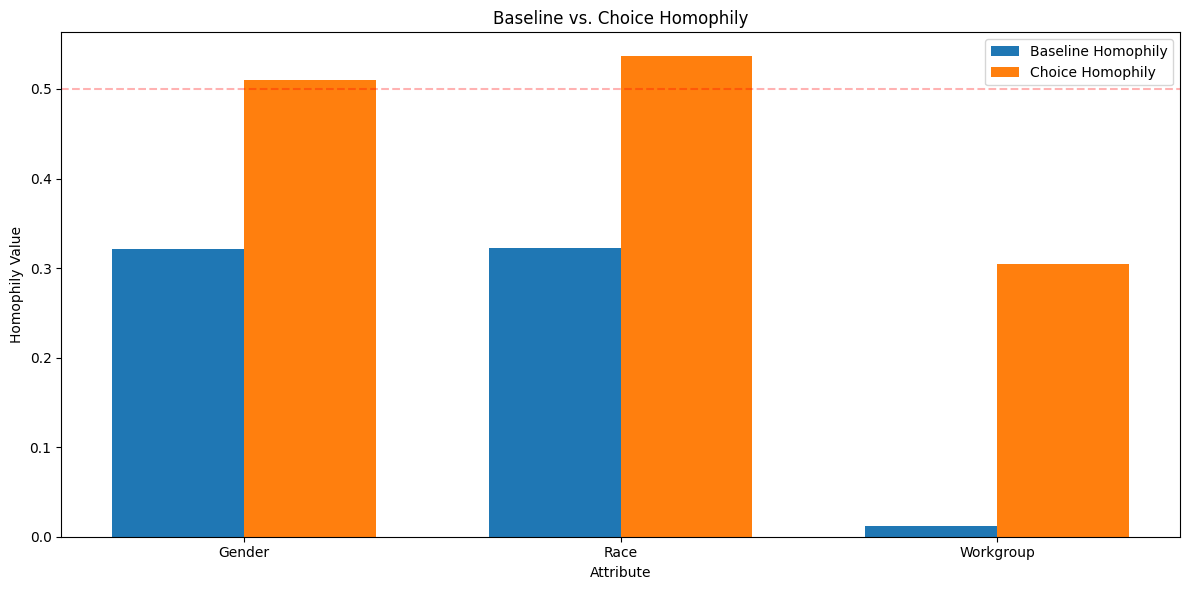

In [34]:
# Create a DataFrame to compare baseline homophily with choice homophily
homophily_df = pd.DataFrame({
    'Attribute': ['Gender', 'Race', 'Workgroup'],
    'Baseline_Homophily': [baseline_homophily_gender, baseline_homophily_race, baseline_homophily_workgroup],
    'Choice_Homophily': [choice_homophily_gender, choice_homophily_race, choice_homophily_workgroup]
})

# Add a column for the difference between choice and baseline homophily
homophily_df['Difference'] = homophily_df['Choice_Homophily'] - homophily_df['Baseline_Homophily']

# Add a column for the normalized choice homophily (choice homophily adjusted for baseline)
homophily_df['Normalized_Choice'] = (homophily_df['Choice_Homophily'] - homophily_df['Baseline_Homophily']) / (1 - homophily_df['Baseline_Homophily'])

# Display the DataFrame
print("Homophily Comparison:")
display(homophily_df)

# Create a bar chart to visualize the comparison
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(homophily_df['Attribute']))

# Plot bars
plt.bar(x - width/2, homophily_df['Baseline_Homophily'], width, label='Baseline Homophily')
plt.bar(x + width/2, homophily_df['Choice_Homophily'], width, label='Choice Homophily')

# Add labels and title
plt.xlabel('Attribute')
plt.ylabel('Homophily Value')
plt.title('Baseline vs. Choice Homophily')
plt.xticks(x, homophily_df['Attribute'])
plt.legend()

# Add horizontal line at y=0.5 for reference
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

- People are more likely to choose others similar to themselves than would occur by chance, especially along certain attributes.

- Gender has a slightly higher normalised homophily than race.

Gender and Race show choice-based homophily, but less so than Workgroup:

    - Gender: +7.7% increase, ~15% of the max strength.

    - Race: +5% increase, ~13.8% of the max strength.

In [35]:


# plt.figure(figsize=(12, 6))
# sns.countplot(data=starterdata, x='workgroup', hue='gender')
# plt.title('Gender Distribution Across Workgroups')
# plt.xlabel('Workgroup')
# plt.ylabel('Count')
# plt.legend(title='Gender')
# plt.show()


# # Contingency table for gender and workgroup
contingency_table_gender = pd.crosstab(df['workgroup'], df['gender'])
# print("Contingency Table for Gender and Workgroup:")
# print(contingency_table_gender)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_gender)

print("Chi-square Test Results Gender Distribution Across Workgroups:")
# Output the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:")
# print(expected)



Chi-square Test Results Gender Distribution Across Workgroups:
Chi-square Statistic: 237.59371546434005
P-value: 4.832968068084967e-19
Degrees of Freedom: 74


Gender distribution is not random across workgroups — some groups have significantly more men or women than we'd expect by chance

In [36]:
# plt.figure(figsize=(12, 6))
# sns.countplot(data=starterdata, x='workgroup', hue='race')
# plt.title('Race Distribution Across Workgroups')
# plt.xlabel('Workgroup')
# plt.ylabel('Count')
# plt.legend(title='Race')
# plt.show()


# # Contingency table for race and workgroup
contingency_table_race = pd.crosstab(df['workgroup'], df['race'])
# print("Contingency Table for Race and Workgroup:")
# print(contingency_table_race)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_race)

print("Chi-square Test Results Race Distribution Across Workgroups:")

# Output the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:")
# print(expected)



Chi-square Test Results Race Distribution Across Workgroups:
Chi-square Statistic: 306.4926585055117
P-value: 4.030916402950478e-13
Degrees of Freedom: 148


Race distribution is not random across workgroups — some groups have significantly more of one race than we'd expect by chance

## Workgroup Focus
I will focuss on workroup 179 and 178

In [37]:
import pandas as pd

# Filter the graph to include only nodes in workgroups 179 and 178
workgroups_of_interest = [178.0, 179.0]
filtered_nodes = [node for node, data in G.nodes(data=True) if 'workgroup' in data and data['workgroup'] in workgroups_of_interest]

# Create a subgraph with only the filtered nodes
subgraph = G.subgraph(filtered_nodes).copy()

# Check if the subgraph is not empty
if subgraph.number_of_nodes() > 0:
    print(f"Number of nodes in the filtered subgraph: {subgraph.number_of_nodes()}")
    print(f"Number of edges in the filtered subgraph: {subgraph.number_of_edges()}")
    
    # Calculate various centrality measures
    betweenness_centrality = nx.betweenness_centrality(subgraph)
    degree_centrality = nx.degree_centrality(subgraph)
    in_degree_centrality = nx.in_degree_centrality(subgraph)
    out_degree_centrality = nx.out_degree_centrality(subgraph)
    closeness_centrality = nx.closeness_centrality(subgraph)
    
    try:
        # These might fail if the graph is not strongly connected
        eigenvector_centrality = nx.eigenvector_centrality(subgraph, max_iter=1000)
        hub_score, authority_score = nx.hits(subgraph, max_iter=1000)
    except:
        eigenvector_centrality = {}
        hub_score, authority_score = {}, {}
        print("Note: Could not compute eigenvector centrality or HITS (graph not strongly connected)")
    
    # Create a DataFrame with all metrics
    centrality_data = []
    
    for node in subgraph.nodes():
        centrality_data.append({
            'Examiner_ID': node,
            'Gender': G.nodes[node].get('gender', 'Unknown'),
            'Race': G.nodes[node].get('race', 'Unknown'),
            'Workgroup': G.nodes[node].get('workgroup', 'Unknown'),
            'Betweenness': betweenness_centrality.get(node, 0),
            'Degree': degree_centrality.get(node, 0),
            'In_Degree': in_degree_centrality.get(node, 0),
            'Out_Degree': out_degree_centrality.get(node, 0),
            'Closeness': closeness_centrality.get(node, 0),
            'Eigenvector': eigenvector_centrality.get(node, 0),
            'Hub_Score': hub_score.get(node, 0),
            'Authority_Score': authority_score.get(node, 0)
        })
    
    # Create DataFrame
    centrality_df = pd.DataFrame(centrality_data)
    
    # Display summary stats
    print("\nCentrality measures summary:")
    display(centrality_df.describe())
    
    # Display top 10 examiners by betweenness centrality
    print("\nTop 10 examiners by betweenness centrality in workgroups 179 and 178:")
    top_betweenness_df = centrality_df.sort_values('Betweenness', ascending=False).head(10)
    display(top_betweenness_df[['Examiner_ID', 'Gender', 'Race', 'Betweenness']])
    
    # Display top 10 examiners by degree centrality
    print("\nTop 10 examiners by degree centrality:")
    top_degree_df = centrality_df.sort_values('Degree', ascending=False).head(10)
    display(top_degree_df[['Examiner_ID', 'Gender', 'Race', 'Degree']])
    
    # Display top 10 examiners by in-degree centrality
    print("\nTop 10 examiners by in-degree centrality (receiving advice):")
    top_in_degree_df = centrality_df.sort_values('In_Degree', ascending=False).head(10)
    display(top_in_degree_df[['Examiner_ID', 'Gender', 'Race', 'In_Degree']])
    
    # Display top 10 examiners by out-degree centrality
    print("\nTop 10 examiners by out-degree centrality (giving advice):")
    top_out_degree_df = centrality_df.sort_values('Out_Degree', ascending=False).head(10)
    display(top_out_degree_df[['Examiner_ID', 'Gender', 'Race', 'Out_Degree']])

    # Display top 10 examiners by Eigenvector
    print("\nTop 10 examiners by Eigenvector:")
    top_out_degree_df = centrality_df.sort_values('Eigenvector', ascending=False).head(10)
    display(top_out_degree_df[['Examiner_ID', 'Gender', 'Race', 'Eigenvector']])
    
    # Identify isolated nodes in the subgraph
    isolated_nodes = [node for node, degree in dict(subgraph.degree()).items() if degree == 0]
    print(f"\nNumber of isolated nodes: {len(isolated_nodes)}")
    if len(isolated_nodes) > 0:
        print(f"Isolated nodes exist, but details are hidden for brevity")
        # Uncomment the line below to see example isolated nodes
        #print(f"Example isolated nodes: {isolated_nodes[:5]}")
else:
    print("No nodes found in workgroups 178 and 179 in the graph.")




Number of nodes in the filtered subgraph: 175
Number of edges in the filtered subgraph: 127

Centrality measures summary:


,Workgroup,Betweenness,Degree,In_Degree,Out_Degree,Closeness,Eigenvector,Hub_Score,Authority_Score
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02,1.750000e+02,1.750000e+02
mean,178.657143,0.000005,0.008342,0.004171,0.004171,0.004043,2.436568e-02,5.714286e-03,5.714286e-03
std,0.476026,0.000038,0.010895,0.007877,0.008679,0.008468,7.176370e-02,1.891815e-02,1.635013e-02
min,178.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.353666e-09,-3.198086e-18,-1.268635e-17
25%,178.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.353666e-09,0.000000e+00,-6.340883e-19
50%,179.000000,0.000000,0.005747,0.000000,0.000000,0.000000,6.353666e-09,0.000000e+00,2.092944e-19
75%,179.000000,0.000000,0.011494,0.005747,0.005747,0.005747,1.651953e-07,1.493134e-18,7.824200e-18
max,179.000000,0.000432,0.057471,0.045977,0.057471,0.049672,4.264596e-01,1.489305e-01,1.195775e-01



Top 10 examiners by betweenness centrality in workgroups 179 and 178:


,Examiner_ID,Gender,Race,Betweenness
2,71388.0,female,white,0.000432
117,93732.0,male,white,0.000233
47,76927.0,female,white,0.000066
52,63219.0,female,white,0.000066
3,67660.0,female,white,0.000000
0,75864.0,male,white,0.000000
1,74313.0,male,Asian,0.000000
7,71035.0,male,white,0.000000
8,84558.0,female,white,0.000000
9,88033.0,male,white,0.000000



Top 10 examiners by degree centrality:


,Examiner_ID,Gender,Race,Degree
38,87049.0,male,white,0.057471
168,79847.0,female,white,0.057471
117,93732.0,male,white,0.051724
26,80730.0,male,white,0.040230
2,71388.0,female,white,0.040230
46,65271.0,male,white,0.028736
54,74579.0,male,Asian,0.028736
167,60078.0,female,white,0.028736
162,65934.0,female,white,0.028736
154,62778.0,female,white,0.028736



Top 10 examiners by in-degree centrality (receiving advice):


,Examiner_ID,Gender,Race,In_Degree
117,93732.0,male,white,0.045977
167,60078.0,female,white,0.028736
46,65271.0,male,white,0.028736
162,65934.0,female,white,0.028736
122,91352.0,female,white,0.028736
54,74579.0,male,Asian,0.028736
154,62778.0,female,white,0.028736
91,93859.0,female,white,0.022989
98,96172.0,female,white,0.022989
17,59456.0,male,Asian,0.022989



Top 10 examiners by out-degree centrality (giving advice):


,Examiner_ID,Gender,Race,Out_Degree
38,87049.0,male,white,0.057471
168,79847.0,female,white,0.057471
26,80730.0,male,white,0.040230
102,98546.0,Other,Asian,0.028736
86,93636.0,male,other,0.022989
71,98253.0,male,white,0.022989
165,62284.0,male,white,0.022989
73,69096.0,male,white,0.022989
69,90168.0,female,Asian,0.017241
100,62170.0,female,white,0.017241



Top 10 examiners by Eigenvector:


,Examiner_ID,Gender,Race,Eigenvector
154,62778.0,female,white,0.426460
117,93732.0,male,white,0.213202
54,74579.0,male,Asian,0.213194
122,91352.0,female,white,0.213194
25,66582.0,male,white,0.213194
149,70887.0,female,white,0.213194
41,87125.0,male,white,0.213194
78,64119.0,female,Hispanic,0.213194
69,90168.0,female,Asian,0.213194
62,62659.0,female,white,0.213194



Number of isolated nodes: 72
Isolated nodes exist, but details are hidden for brevity


General Graph Structure
- 175 nodes, 127 edges. a relatively sparse network.
- 72 isolated nodes. ~41% of people have no incoming or outgoing connections (they neither give nor receive advice).
    - This suggests a low level of connectivity, possibly due to siloed work or lack of engagement.

Centrality Measures
1. Betweenness Centrality
- Measures how often a node acts as a bridge on the shortest path between other nodes.
- Mean: ~0.000005, Max: 0.000432. very low overall values and few true "bridges" or brokers exist.
- Top node: Examiner 71388.0 (female, white) is the most central broker and possibly a key facilitator or information gatekeeper.


2. Degree Centrality (Overall Connectivity)
- Mean: 0.00834. most people are connected to very few others.
- Top nodes (79847.0, 87049.0) have the highest degree (0.057471), meaning they connect to ~5.7% of the network.
- Degree leaders tend to be white, with a gender mix.

3. In-Degree (Receiving Advice)
- Measures perceived expertise or popularity as an advice source.
- Examiner 93732.0 (male, white) is the top advice recipient.
- Mix of male/female, white/Asian and there is a diversity among recipients.

4. Out-Degree (Giving Advice)
- Measures how active or outgoing someone is in sharing advice.
- Examiner 79847.0 (female, white) and 87049.0 (male, white) are the most active advisors.
- Examiner 98546.0 (Other, Asian) is also in the top ranks and is intresting as is in a minority demographic.

5. Closeness
- Very low across the board and suggests a fragmented or slow-to-reach network.

6. Eigenvector, Hub, Authority Scores
- Very small and skewed toward a few nodes and again, few nodes dominate influence.
- Max eigenvector centrality = 0.426. This is a white female and is highly connected to other central nodes.



#### Examiner 71388 is the most structurally powerful bridge. They may be a key communicator, mentor, or coordinator.

- The fact that most betweenness values are 0 indicates a highly clustered or siloed network.

- Examiner 71388:
    - could be a mentors or trainer (bridging roles).
    - could be an information broker
    - strengthens the networks resilience by connecting isolated individuals.


In [38]:
# Extract data for examiner ID 71388.0
examiner_details = starterdata[starterdata['examiner_id'] == 71388.0]

# Display basic information
if not examiner_details.empty:
    print("Examiner ID 71388.0 Details:")
    print(f"Gender: {examiner_details['gender'].iloc[0]}")
    print(f"Race: {examiner_details['race'].iloc[0]}")
    print(f"Workgroup: {examiner_details['workgroup'].iloc[0]}")
    print(f"Tech Center: {examiner_details['tech_center'].iloc[0]}")
    print(f"Center Name: {examiner_details['center_name'].iloc[0]}")
    
    # Count patent applications processed by this examiner
    print(f"Number of patent applications: {len(examiner_details)}")
    
    # Look at network measures from centrality analysis
    print("\nNetwork Centrality Measures:")
    print(f"Betweenness Centrality: {betweenness_centrality.get('71388.0', 'Not available')}")
    print(f"Degree Centrality: {degree_centrality.get('71388.0', 'Not available')}")
    print(f"In-Degree Centrality: {in_degree_centrality.get('71388.0', 'Not available')}")
    print(f"Out-Degree Centrality: {out_degree_centrality.get('71388.0', 'Not available')}")
else:
    print("No details found for examiner ID 71388.0")

Examiner ID 71388.0 Details:
Gender: female
Race: white
Workgroup: 177
Tech Center: 17
Center Name: Chemical_Materials-Engineering
Number of patent applications: 651

Network Centrality Measures:
Betweenness Centrality: 0.00043186499235931165
Degree Centrality: 0.040229885057471264
In-Degree Centrality: 0.022988505747126436
Out-Degree Centrality: 0.017241379310344827


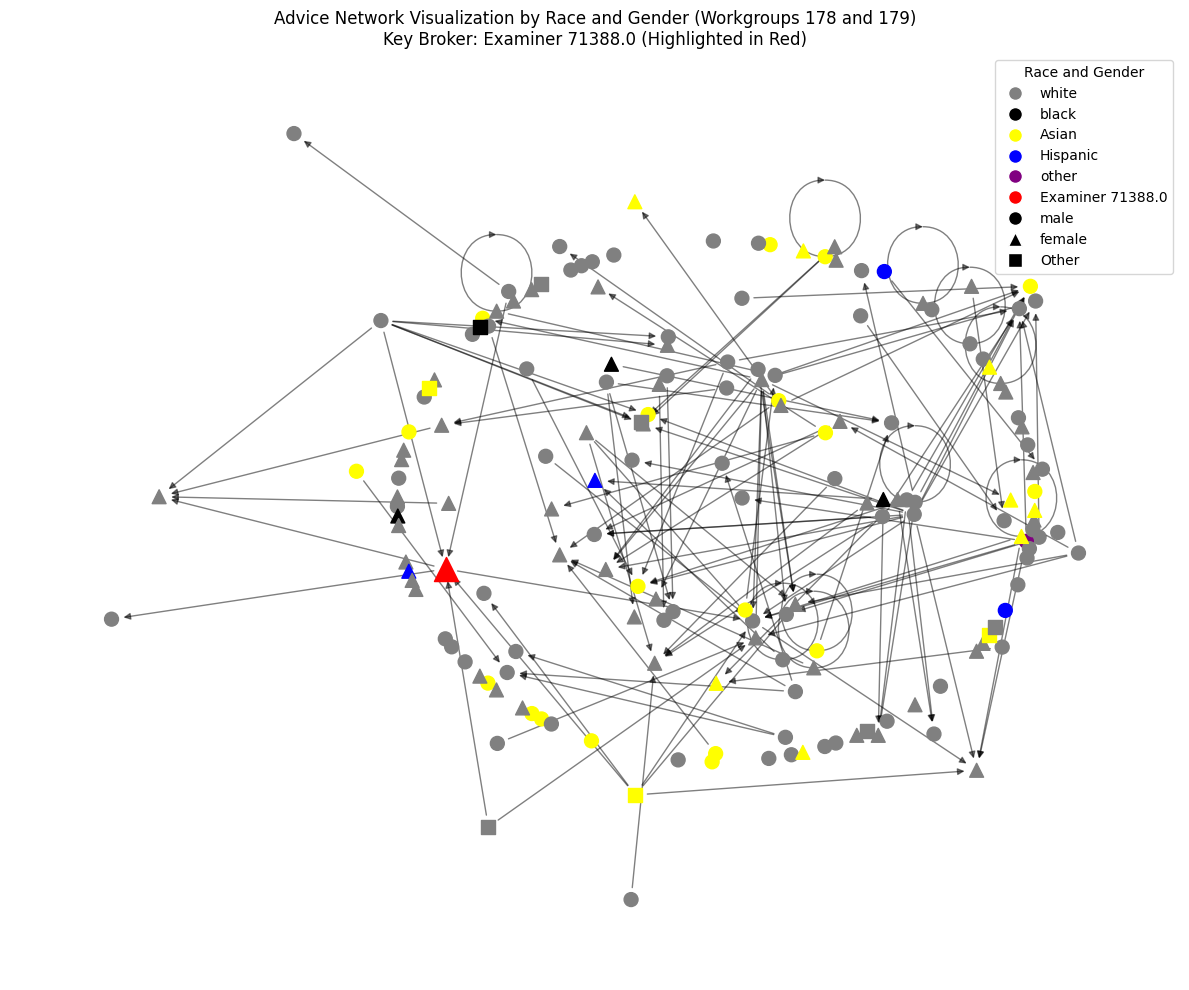

In [39]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'subgraph' is your filtered subgraph for workgroups 178 and 179

# Visualize the network with nodes colored by race and gender
plt.figure(figsize=(12, 10))

# Create a color map for race
race_to_color = {
    'white': 'grey',
    'black': 'black',
    'Asian': 'yellow',
    'Hispanic': 'blue',
    'other': 'purple'
}

# Create a color map for gender
gender_to_shape = {
    'male': 'o',
    'female': '^',
    'Other': 's'
}

# Get node colors based on race attribute
node_colors = []
node_shapes = []
for node in subgraph.nodes():
    race = subgraph.nodes[node].get('race', 'Unknown')
    gender = subgraph.nodes[node].get('gender', 'Unknown')
    # Highlight examiner 71388.0 in red
    if node == '71388.0':
        node_colors.append('red')
    else:
        node_colors.append(race_to_color.get(race, 'black'))
    node_shapes.append(gender_to_shape.get(gender, '^'))

# Create network layout
pos = nx.kamada_kawai_layout(subgraph)

# Draw nodes and edges
for shape in gender_to_shape.values():
    nodes_subset = [node for node, shape_node in zip(subgraph.nodes(), node_shapes) if shape_node == shape]
    nx.draw_networkx_nodes(subgraph, pos, nodelist=nodes_subset, node_color=[node_colors[i] for i, node in enumerate(subgraph.nodes()) if node in nodes_subset], node_shape=shape, node_size=100)

# Make node 71388.0 larger to highlight it
nx.draw_networkx_nodes(subgraph, pos, nodelist=['71388.0'], node_color='red', node_shape='^', node_size=300)

nx.draw_networkx_edges(subgraph, pos, alpha=0.5, arrows=True, arrowsize=10)

# Create legend for race and gender
legend_elements_race = [plt.Line2D([0], [0], marker='o', color='w',
                                   markerfacecolor=color, markersize=10, label=race)
                         for race, color in race_to_color.items()]
# Add the highlight for examiner 71388.0
legend_elements_race.append(plt.Line2D([0], [0], marker='o', color='w',
                                      markerfacecolor='red', markersize=10, label='Examiner 71388.0'))

legend_elements_gender = [plt.Line2D([0], [0], marker=shape, color='w',
                                     markerfacecolor='black', markersize=10, label=gender)
                           for gender, shape in gender_to_shape.items()]

plt.legend(handles=legend_elements_race + legend_elements_gender, title="Race and Gender", loc="upper right")

plt.title('Advice Network Visualization by Race and Gender (Workgroups 178 and 179)\nKey Broker: Examiner 71388.0 (Highlighted in Red)')
plt.axis('off')
plt.tight_layout()
plt.show()


Homophily Comparison:


,Attribute,Baseline_Homophily,Choice_Homophily,Difference,Normalized_Choice
0,Gender,0.473698,0.551181,0.077483,0.147222
1,Race,0.634416,0.685039,0.050623,0.138472
2,Workgroup,0.549388,0.811024,0.261636,0.580623


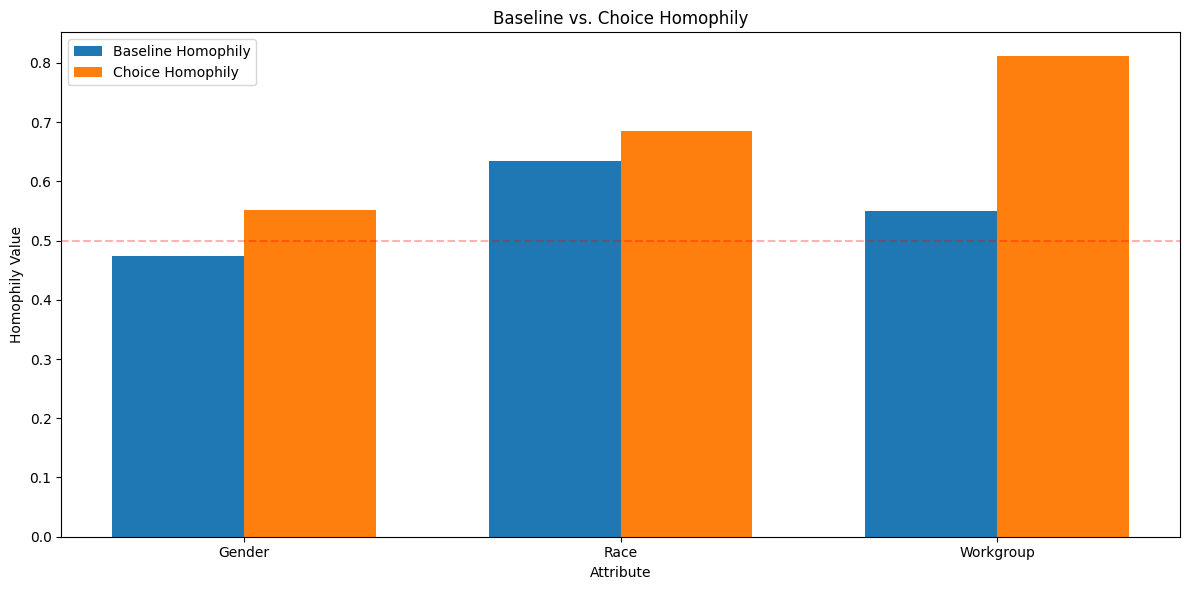

In [40]:
# Calculate the distribution of attributes in the subgraph
# Filter the subgraph to include only nodes in workgroups 178 and 179
# Calculate the distribution of attributes
gender_counts = Counter(data['gender'] for node, data in subgraph.nodes(data=True))
race_counts = Counter(data['race'] for node, data in subgraph.nodes(data=True))
workgroup_counts = Counter(data['workgroup'] for node, data in subgraph.nodes(data=True))

# Calculate the total number of nodes
total_nodes = subgraph.number_of_nodes()

# Calculate baseline homophily for gender
baseline_homophily_gender = sum(
    (count / total_nodes) ** 2 for count in gender_counts.values()
)

# Calculate baseline homophily for race
baseline_homophily_race = sum(
    (count / total_nodes) ** 2 for count in race_counts.values()
)

# Calculate baseline homophily for workgroup
baseline_homophily_workgroup = sum(
    (count / total_nodes) ** 2 for count in workgroup_counts.values()
)

# print(f"Baseline Homophily (Gender): {baseline_homophily_gender}")
# print(f"Baseline Homophily (Race): {baseline_homophily_race}")
# print(f"Baseline Homophily (Workgroup): {baseline_homophily_workgroup}")

# Calculate the number of intra-group edges for gender
intra_gender_edges = sum(
    1 for u, v, data in subgraph.edges(data=True)
    if subgraph.nodes[u]['gender'] == subgraph.nodes[v]['gender']
)

# Calculate the number of intra-group edges for race
intra_race_edges = sum(
    1 for u, v, data in subgraph.edges(data=True)
    if subgraph.nodes[u]['race'] == subgraph.nodes[v]['race']
)

# Calculate the number of intra-group edges for workgroup
intra_workgroup_edges = sum(
    1 for u, v, data in subgraph.edges(data=True)
    if subgraph.nodes[u]['workgroup'] == subgraph.nodes[v]['workgroup']
)

# Calculate the total number of edges
total_edges = subgraph.number_of_edges()

# Calculate choice homophily for gender
choice_homophily_gender = intra_gender_edges / total_edges

# Calculate choice homophily for race
choice_homophily_race = intra_race_edges / total_edges

# Calculate choice homophily for workgroup
choice_homophily_workgroup = intra_workgroup_edges / total_edges

# print(f"Choice Homophily (Gender): {choice_homophily_gender}")
# print(f"Choice Homophily (Race): {choice_homophily_race}")
# print(f"Choice Homophily (Workgroup): {choice_homophily_workgroup}")

# Create a DataFrame to compare baseline homophily with choice homophily
homophily_df = pd.DataFrame({
    'Attribute': ['Gender', 'Race', 'Workgroup'],
    'Baseline_Homophily': [baseline_homophily_gender, baseline_homophily_race, baseline_homophily_workgroup],
    'Choice_Homophily': [choice_homophily_gender, choice_homophily_race, choice_homophily_workgroup]
})

# Add a column for the difference between choice and baseline homophily
homophily_df['Difference'] = homophily_df['Choice_Homophily'] - homophily_df['Baseline_Homophily']

# Add a column for the normalized choice homophily (choice homophily adjusted for baseline)
homophily_df['Normalized_Choice'] = (homophily_df['Choice_Homophily'] - homophily_df['Baseline_Homophily']) / (1 - homophily_df['Baseline_Homophily'])

# Display the DataFrame
print("Homophily Comparison:")
display(homophily_df)

# Create a bar chart to visualize the comparison
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(homophily_df['Attribute']))

# Plot bars
plt.bar(x - width/2, homophily_df['Baseline_Homophily'], width, label='Baseline Homophily')
plt.bar(x + width/2, homophily_df['Choice_Homophily'], width, label='Choice Homophily')

# Add labels and title
plt.xlabel('Attribute')
plt.ylabel('Homophily Value')
plt.title('Baseline vs. Choice Homophily')
plt.xticks(x, homophily_df['Attribute'])
plt.legend()

# Add horizontal line at y=0.5 for reference
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


There is clear choice homophily between gender and race as shown by normalised choice.

## Graph subset of full network

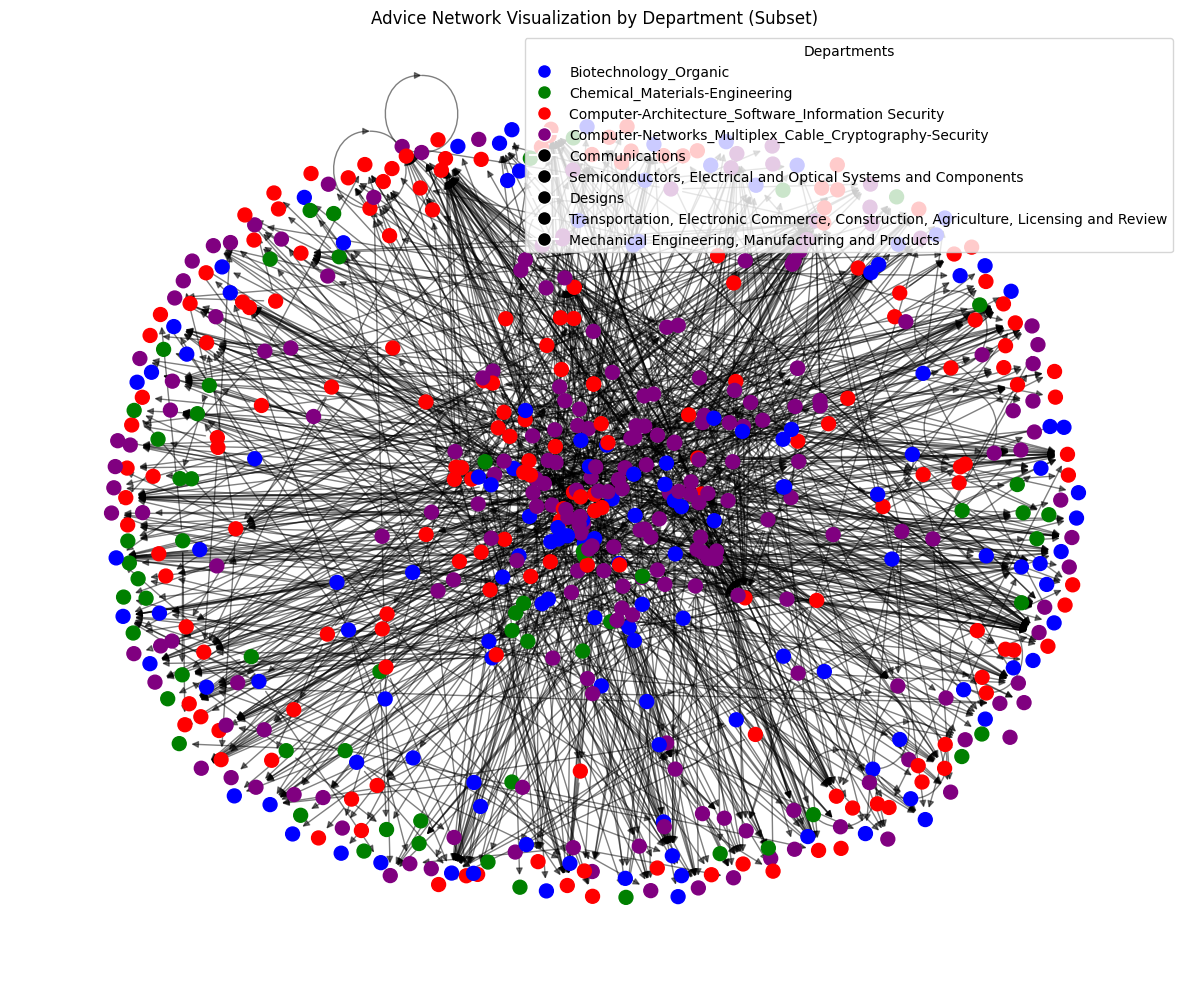

In [41]:

# Visualize the network with departments (using a subset for clarity)
plt.figure(figsize=(12, 10))
subset_nodes = list(G.nodes())[:600]  # Limit to first 200 nodes for visibility
subset_G = G.subgraph(subset_nodes)

# Create a color map for tech centers
tech_center_to_color = {
    16: 'blue',         # Biotechnology_Organic
    17: 'green',        # Chemical_Materials-Engineering
    21: 'red',          # Computer-Architecture_Software_Information Security
    24: 'purple',       # Computer-Networks_Multiplex_Cable_Cryptography-Security
    # 26: 'orange',       # Communications
    # 28: 'brown',        # Semiconductors, Electrical and Optical Systems and Components
    # 29: 'pink',         # Designs
    # 36: 'gray',         # Transportation, Electronic Commerce, Construction, Agriculture, Licensing and Review
    # 37: 'cyan'          # Mechanical Engineering, Manufacturing and Products
}

# Get node colors based on tech_center attribute
node_colors = []
for node in subset_G.nodes():
    if 'tech_center' in subset_G.nodes[node]:
        tech_center = subset_G.nodes[node]['tech_center']
        node_colors.append(tech_center_to_color.get(tech_center, 'black'))
    else:
        node_colors.append('black')  # Default color for nodes without tech_center attribute

# Create network layout
pos = nx.spring_layout(subset_G, seed=42)

# Draw nodes and edges
nx.draw_networkx_nodes(subset_G, pos, node_color=node_colors, node_size=100)
nx.draw_networkx_edges(subset_G, pos, alpha=0.5, arrows=True, arrowsize=10)

# Create legend for departments
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=color, markersize=10, label=dept)
                  for tech_center, dept in tech_center_to_department.items()
                  for color in [tech_center_to_color.get(tech_center, 'black')]]

plt.legend(handles=legend_elements, title="Departments", loc="upper right")

plt.title('Advice Network Visualization by Department (Subset)')
plt.axis('off')
plt.tight_layout()
plt.show()